In [56]:
from definitions import target_var, data_path, incl_countries, incl_years, donor_countries, treatment_countries, \
    country_col, year_col, month_col, quarter_col, date_col, model_val, timeframe_val, tables_path_res, save_output, \
    fake_num, figures_path_data, agg_val, interpolation_val
from helper_functions_general import read_data, select_country_year_measure, month_name_to_num, rename_order_scale, \
    downsample_month_to_quarter, quarter_to_month, upsample_quarter_to_month, get_timeframe_col, get_trans, \
    get_data_path, get_fig_path, get_impl_date
from statistical_tests import stat_test
from plot_functions import plot_series

import SparseSC
import numpy as np

In [61]:
def sc_pivot(df: object, treatment_country: str):

    df = df[df[country_col].isin(donor_countries + [treatment_country])]
    df_pivot = df.copy()
    df_pivot = df_pivot.pivot(index=country_col, columns=date_col, values=target_var)
    df_pivot = df_pivot.dropna(axis=1, how='any')

    pre_treat = df_pivot.iloc[:, df_pivot.columns < get_impl_date(treatment_country)]
    post_treat = df_pivot.iloc[:, df_pivot.columns >= get_impl_date(treatment_country)]
    treat_unit = [idx for idx, val in enumerate(df_pivot.index.values) if val == treatment_country]

    return df_pivot, pre_treat, post_treat, treat_unit

In [64]:
def sc(df: object, treatment_country: str):
    # pivot target and donors
    df_pivot, pre_treat, post_treat, treat_unit = sc_pivot(df=df, treatment_country=treatment_country)

    model = SparseSC.fit(
        features=np.array(pre_treat),
        targets=np.array(post_treat),
        treated_units=treat_unit,
    )

    act_pred = df_pivot.loc[df_pivot.index == treatment_country].T
    act_pred.columns = ['act']
    act_pred['pred'] = model.predict(df_pivot.values)[treat_unit, :][0]

    return act_pred

In [65]:
timeframe = 'm'
stat = 'stat'

In [66]:
df = read_data(source_path=get_data_path(timeframe=timeframe), file_name=f'total_{timeframe}')
df

df_log_diff = read_data(source_path=get_data_path(timeframe=timeframe), file_name=f'total_{timeframe}_{stat}')
df_log_diff

,country,date,year,month,co2,gdp,infl,pop,brent,co2_cap,gdp_cap
0,austria,2002-01-01,2002,1,0.052060,0.009157,-0.004,0.001714,-0.281373,0.069483,0.007443
1,austria,2002-02-01,2002,2,-0.025243,0.020299,-0.001,0.001568,-0.294420,-0.066421,0.018731
2,austria,2002-03-01,2002,3,0.018000,0.031382,-0.002,0.001422,0.081951,-0.005582,0.029961
3,austria,2002-04-01,2002,4,0.028786,0.042408,-0.009,0.001275,-0.117204,-0.092207,0.041132
4,austria,2002-05-01,2002,5,0.054459,0.047218,-0.013,0.001162,-0.130776,0.028971,0.046056
...,...,...,...,...,...,...,...,...,...,...,...
4061,united kingdom,2019-06-01,2019,6,-0.017357,0.020092,-99999.000,-0.000658,-0.620213,-0.034180,0.020749
4062,united kingdom,2019-07-01,2019,7,-0.034553,0.023307,-99999.000,-0.000707,-0.576092,-0.064917,0.024013
4063,united kingdom,2019-08-01,2019,8,-0.020662,0.025343,-99999.000,-0.000756,-0.544328,-0.037323,0.026098
4064,united kingdom,2019-09-01,2019,9,-0.005156,0.027362,-99999.000,-0.000805,-0.567650,0.000994,0.028167


In [67]:
act_pred = sc(df=df_log_diff, treatment_country=treatment_country);
act_pred

Calculating maximum covariate penalty (i.e. the gradient at zero) |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 
10-fold Cross Validation with 14 control units, 144 predictors and 70 outcomes; Y may contain post-intervention outcomes
[Path] i: 1, In Sample R^2: 0.994703, incremental R^2:: 0.994703, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.80108281e+10 -1.80106648e+10 -1.80107494e+10 -1.80107917e+10
 -1.80108334e+10 -1.80107830e+10 -1.80108698e+10 -1.80107893e+10
 -1.80107615e+10 -1.80110145e+10 -1.80106008e+10 -1.80106562e+10
 -1.80108562e+10 -1.80111552e+10 -1.80108826e+10 -1.80108179e+10
 -1.80108370e+10 -1.80108265e+10 -1.80108636e+10 -1.80109221e+10
 -1.80108088e+10 -1.80109104e+10 -1.80108094e+10 -1.80106972e+10
 -1.80108331e+10 -1.80106654e+10 -1.80108760e+10 -1.80107871e+10
 -1.80109540e+10 -1.80108849e+10 -1.80108127e+10 -1.80107959e+10
 -1.80108483e+10 -1.80106191e+10 -1.80109033e+10 -1.80108470e+10
 -1.8010709

[Path] i: 1, In Sample R^2: 0.994613, incremental R^2:: 0.994613, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.78451462e+10 -1.78449830e+10 -1.78450676e+10 -1.78451098e+10
 -1.78451515e+10 -1.78451011e+10 -1.78451880e+10 -1.78451074e+10
 -1.78450797e+10 -1.78453327e+10 -1.78449189e+10 -1.78449743e+10
 -1.78451743e+10 -1.78454733e+10 -1.78452008e+10 -1.78451360e+10
 -1.78451552e+10 -1.78451447e+10 -1.78451817e+10 -1.78452402e+10
 -1.78451270e+10 -1.78452286e+10 -1.78451275e+10 -1.78450154e+10
 -1.78451512e+10 -1.78449835e+10 -1.78451941e+10 -1.78451053e+10
 -1.78452721e+10 -1.78452031e+10 -1.78451308e+10 -1.78451140e+10
 -1.78451664e+10 -1.78449373e+10 -1.78452214e+10 -1.78451651e+10
 -1.78450276e+10 -1.78452598e+10 -1.78451986e+10 -1.78451149e+10
 -1.78450513e+10 -1.78451105e+10 -1.78451259e+10 -1.78451195e+10
 -1.78450649e+10 -1.78451037e+10 -1.78451735e+10 -1.78452016e+10
 -1.78453302e+10 -1.78450979e+10 -1.78451881e+10 -1.78451

[Path] i: 1, In Sample R^2: 0.994230, incremental R^2:: 0.994230, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.71358070e+10 -1.71356437e+10 -1.71357283e+10 -1.71357705e+10
 -1.71358123e+10 -1.71357619e+10 -1.71358487e+10 -1.71357681e+10
 -1.71357404e+10 -1.71359934e+10 -1.71355796e+10 -1.71356350e+10
 -1.71358350e+10 -1.71361340e+10 -1.71358615e+10 -1.71357967e+10
 -1.71358159e+10 -1.71358054e+10 -1.71358424e+10 -1.71359010e+10
 -1.71357877e+10 -1.71358893e+10 -1.71357883e+10 -1.71356761e+10
 -1.71358119e+10 -1.71356442e+10 -1.71358548e+10 -1.71357660e+10
 -1.71359328e+10 -1.71358638e+10 -1.71357915e+10 -1.71357747e+10
 -1.71358272e+10 -1.71355980e+10 -1.71358821e+10 -1.71358258e+10
 -1.71356883e+10 -1.71359205e+10 -1.71358593e+10 -1.71357756e+10
 -1.71357120e+10 -1.71357712e+10 -1.71357866e+10 -1.71357802e+10
 -1.71357256e+10 -1.71357645e+10 -1.71358343e+10 -1.71358623e+10
 -1.71359909e+10 -1.71357586e+10 -1.71358488e+10 -1.71357

[Path] i: 1, In Sample R^2: 0.992590, incremental R^2:: 0.992590, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.40988835e+10 -1.40987202e+10 -1.40988048e+10 -1.40988471e+10
 -1.40988888e+10 -1.40988384e+10 -1.40989253e+10 -1.40988447e+10
 -1.40988170e+10 -1.40990699e+10 -1.40986562e+10 -1.40987116e+10
 -1.40989116e+10 -1.40992106e+10 -1.40989381e+10 -1.40988733e+10
 -1.40988925e+10 -1.40988819e+10 -1.40989190e+10 -1.40989775e+10
 -1.40988643e+10 -1.40989659e+10 -1.40988648e+10 -1.40987526e+10
 -1.40988885e+10 -1.40987208e+10 -1.40989314e+10 -1.40988426e+10
 -1.40990094e+10 -1.40989403e+10 -1.40988681e+10 -1.40988513e+10
 -1.40989037e+10 -1.40986746e+10 -1.40989587e+10 -1.40989024e+10
 -1.40987649e+10 -1.40989971e+10 -1.40989359e+10 -1.40988522e+10
 -1.40987886e+10 -1.40988477e+10 -1.40988632e+10 -1.40988568e+10
 -1.40988022e+10 -1.40988410e+10 -1.40989108e+10 -1.40989389e+10
 -1.40990674e+10 -1.40988352e+10 -1.40989254e+10 -1.40988

[Path] i: 1, In Sample R^2: 0.985568, incremental R^2:: 0.985568, learning rate: 0.22222,  alpha: 1024.00000, zeros: 135
[STOP ITERATION: alpha is None] i: 2, grad: [-1.09641730e+09 -1.09625401e+09 -1.09633861e+09 -1.09638088e+09
 -1.09642260e+09 -1.09637220e+09 -1.09645903e+09 -1.09637847e+09
 -1.09635076e+09 -1.09660371e+09 -1.09618998e+09 -1.09624539e+09
 -1.09644537e+09 -1.09674438e+09 -1.09647183e+09 -1.09640709e+09
 -1.09642625e+09 -1.09641571e+09 -1.09645277e+09 -1.09651129e+09
 -1.09639805e+09 -1.09649961e+09 -1.09639859e+09 -1.09628641e+09
 -1.09642229e+09 -1.09625458e+09 -1.09646517e+09 -1.09637634e+09
 -1.09654316e+09 -1.09647411e+09 -1.09640189e+09 -1.09638509e+09
 -1.09643750e+09 -1.09620835e+09 -1.09649247e+09 -1.09643617e+09
 -1.09629864e+09 -1.09653083e+09 -1.09646969e+09 -1.09638593e+09
 -1.09632237e+09 -1.09638151e+09 -1.09639698e+09 -1.09639057e+09
 -1.09633593e+09 -1.09637480e+09 -1.09644460e+09 -1.09647268e+09
 -1.09660120e+09 -1.09636894e+09 -1.09645911e+09 -1.096

[Path] i: 1, In Sample R^2: 0.955503, incremental R^2:: 0.955503, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.45688947e+10 5.45690580e+10 5.45689734e+10 5.45689312e+10
 5.45688894e+10 5.45689398e+10 5.45688530e+10 5.45689336e+10
 5.45689613e+10 5.45687083e+10 5.45691221e+10 5.45690667e+10
 5.45688667e+10 5.45685676e+10 5.45688402e+10 5.45689049e+10
 5.45688858e+10 5.45688963e+10 5.45688593e+10 5.45688007e+10
 5.45689140e+10 5.45688124e+10 5.45689134e+10 5.45690256e+10
 5.45688897e+10 5.45690575e+10 5.45688469e+10 5.45689357e+10
 5.45687689e+10 5.45688379e+10 5.45689101e+10 5.45689269e+10
 5.45688745e+10 5.45691037e+10 5.45688196e+10 5.45688759e+10
 5.45690134e+10 5.45687812e+10 5.45688423e+10 5.45689261e+10
 5.45689897e+10 5.45689305e+10 5.45689151e+10 5.45689215e+10
 5.45689761e+10 5.45689372e+10 5.45688674e+10 5.45688394e+10
 5.45687108e+10 5.45689431e+10 5.45688529e+10 5.45689225e+10
 5.45689460e+10 5.45689201e+10 5.45688880e+1

[Path] i: 1, In Sample R^2: 0.826787, incremental R^2:: 0.826787, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92892881e+11 2.92893044e+11 2.92892960e+11 2.92892917e+11
 2.92892876e+11 2.92892926e+11 2.92892839e+11 2.92892920e+11
 2.92892948e+11 2.92892695e+11 2.92893108e+11 2.92893053e+11
 2.92892853e+11 2.92892554e+11 2.92892827e+11 2.92892891e+11
 2.92892872e+11 2.92892883e+11 2.92892846e+11 2.92892787e+11
 2.92892900e+11 2.92892799e+11 2.92892900e+11 2.92893012e+11
 2.92892876e+11 2.92893044e+11 2.92892833e+11 2.92892922e+11
 2.92892755e+11 2.92892824e+11 2.92892896e+11 2.92892913e+11
 2.92892861e+11 2.92893090e+11 2.92892806e+11 2.92892862e+11
 2.92893000e+11 2.92892768e+11 2.92892829e+11 2.92892912e+11
 2.92892976e+11 2.92892917e+11 2.92892901e+11 2.92892908e+11
 2.92892962e+11 2.92892924e+11 2.92892854e+11 2.92892826e+11
 2.92892697e+11 2.92892929e+11 2.92892839e+11 2.92892909e+11
 2.92892932e+11 2.92892906e+11 2.92892874e+1

[Path] i: 1, In Sample R^2: 0.275711, incremental R^2:: 0.275711, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31323710e+12 1.31323727e+12 1.31323718e+12 1.31323714e+12
 1.31323710e+12 1.31323715e+12 1.31323706e+12 1.31323714e+12
 1.31323717e+12 1.31323692e+12 1.31323733e+12 1.31323727e+12
 1.31323707e+12 1.31323678e+12 1.31323705e+12 1.31323711e+12
 1.31323709e+12 1.31323710e+12 1.31323707e+12 1.31323701e+12
 1.31323712e+12 1.31323702e+12 1.31323712e+12 1.31323723e+12
 1.31323710e+12 1.31323727e+12 1.31323705e+12 1.31323714e+12
 1.31323698e+12 1.31323705e+12 1.31323712e+12 1.31323713e+12
 1.31323708e+12 1.31323731e+12 1.31323703e+12 1.31323708e+12
 1.31323722e+12 1.31323699e+12 1.31323705e+12 1.31323713e+12
 1.31323720e+12 1.31323714e+12 1.31323712e+12 1.31323713e+12
 1.31323718e+12 1.31323714e+12 1.31323708e+12 1.31323705e+12
 1.31323692e+12 1.31323715e+12 1.31323706e+12 1.31323713e+12
 1.31323715e+12 1.31323713e+12 1.31323710e+1

[STOP ITERATION: alpha is None] i: 1, grad: [1.17754696e+13 1.17754698e+13 1.17754697e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754694e+13 1.17754698e+13 1.17754698e+13
 1.17754696e+13 1.17754693e+13 1.17754695e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754696e+13 1.17754695e+13
 1.17754696e+13 1.17754695e+13 1.17754696e+13 1.17754697e+13
 1.17754696e+13 1.17754698e+13 1.17754695e+13 1.17754696e+13
 1.17754695e+13 1.17754695e+13 1.17754696e+13 1.17754696e+13
 1.17754696e+13 1.17754698e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754695e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754696e+13 1.17754696e+13 1.17754696e+13
 1.17754697e+13 1.17754696e+13 1.17754696e+13 1.17754695e+13
 1.17754694e+13 1.17754696e+13 1.17754695e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754696e+13 1.17754696e+13
 1.17754696e+13 1.17754697e+13 1.17754697e+13 1.17754698e+13
 1.17754699e+13 1.17754698e+13 1.17754699

[Path] i: 1, In Sample R^2: 0.981824, incremental R^2:: 0.981824, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.38676776e+10 -4.38674901e+10 -4.38676120e+10 -4.38676729e+10
 -4.38676928e+10 -4.38676443e+10 -4.38677437e+10 -4.38676456e+10
 -4.38676283e+10 -4.38679336e+10 -4.38674325e+10 -4.38675087e+10
 -4.38678014e+10 -4.38681719e+10 -4.38677997e+10 -4.38676994e+10
 -4.38677647e+10 -4.38677506e+10 -4.38677822e+10 -4.38678582e+10
 -4.38677120e+10 -4.38678289e+10 -4.38676917e+10 -4.38675485e+10
 -4.38677305e+10 -4.38675169e+10 -4.38677757e+10 -4.38676659e+10
 -4.38678412e+10 -4.38677582e+10 -4.38676755e+10 -4.38676549e+10
 -4.38677370e+10 -4.38674733e+10 -4.38678206e+10 -4.38677551e+10
 -4.38675432e+10 -4.38678269e+10 -4.38677683e+10 -4.38676761e+10
 -4.38676145e+10 -4.38676689e+10 -4.38676916e+10 -4.38676899e+10
 -4.38676234e+10 -4.38676492e+10 -4.38677286e+10 -4.38677576e+10
 -4.38679506e+10 -4.38676632e+10 -4.38677699e+10 -4.38676

[Path] i: 1, In Sample R^2: 0.981706, incremental R^2:: 0.981706, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.37019964e+10 -4.37018089e+10 -4.37019308e+10 -4.37019918e+10
 -4.37020117e+10 -4.37019631e+10 -4.37020625e+10 -4.37019644e+10
 -4.37019472e+10 -4.37022525e+10 -4.37017513e+10 -4.37018275e+10
 -4.37021202e+10 -4.37024907e+10 -4.37021186e+10 -4.37020182e+10
 -4.37020835e+10 -4.37020694e+10 -4.37021010e+10 -4.37021770e+10
 -4.37020308e+10 -4.37021477e+10 -4.37020105e+10 -4.37018673e+10
 -4.37020493e+10 -4.37018357e+10 -4.37020945e+10 -4.37019847e+10
 -4.37021600e+10 -4.37020770e+10 -4.37019943e+10 -4.37019737e+10
 -4.37020558e+10 -4.37017921e+10 -4.37021394e+10 -4.37020739e+10
 -4.37018620e+10 -4.37021457e+10 -4.37020871e+10 -4.37019949e+10
 -4.37019333e+10 -4.37019877e+10 -4.37020104e+10 -4.37020087e+10
 -4.37019423e+10 -4.37019680e+10 -4.37020474e+10 -4.37020764e+10
 -4.37022694e+10 -4.37019820e+10 -4.37020887e+10 -4.37019

[Path] i: 1, In Sample R^2: 0.981202, incremental R^2:: 0.981202, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.29926602e+10 -4.29924727e+10 -4.29925946e+10 -4.29926555e+10
 -4.29926754e+10 -4.29926269e+10 -4.29927263e+10 -4.29926282e+10
 -4.29926109e+10 -4.29929163e+10 -4.29924151e+10 -4.29924913e+10
 -4.29927840e+10 -4.29931545e+10 -4.29927823e+10 -4.29926820e+10
 -4.29927473e+10 -4.29927332e+10 -4.29927648e+10 -4.29928408e+10
 -4.29926946e+10 -4.29928115e+10 -4.29926743e+10 -4.29925311e+10
 -4.29927131e+10 -4.29924995e+10 -4.29927583e+10 -4.29926485e+10
 -4.29928238e+10 -4.29927408e+10 -4.29926581e+10 -4.29926375e+10
 -4.29927196e+10 -4.29924559e+10 -4.29928032e+10 -4.29927377e+10
 -4.29925258e+10 -4.29928095e+10 -4.29927509e+10 -4.29926587e+10
 -4.29925971e+10 -4.29926515e+10 -4.29926742e+10 -4.29926725e+10
 -4.29926060e+10 -4.29926318e+10 -4.29927112e+10 -4.29927402e+10
 -4.29929332e+10 -4.29926458e+10 -4.29927525e+10 -4.29926

[Path] i: 1, In Sample R^2: 0.979045, incremental R^2:: 0.979045, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-3.99557560e+10 -3.99555685e+10 -3.99556904e+10 -3.99557513e+10
 -3.99557712e+10 -3.99557226e+10 -3.99558220e+10 -3.99557240e+10
 -3.99557067e+10 -3.99560120e+10 -3.99555109e+10 -3.99555871e+10
 -3.99558797e+10 -3.99562502e+10 -3.99558781e+10 -3.99557777e+10
 -3.99558430e+10 -3.99558289e+10 -3.99558605e+10 -3.99559365e+10
 -3.99557903e+10 -3.99559073e+10 -3.99557700e+10 -3.99556269e+10
 -3.99558088e+10 -3.99555952e+10 -3.99558541e+10 -3.99557442e+10
 -3.99559195e+10 -3.99558366e+10 -3.99557539e+10 -3.99557333e+10
 -3.99558154e+10 -3.99555517e+10 -3.99558990e+10 -3.99558335e+10
 -3.99556215e+10 -3.99559052e+10 -3.99558467e+10 -3.99557544e+10
 -3.99556928e+10 -3.99557472e+10 -3.99557700e+10 -3.99557682e+10
 -3.99557018e+10 -3.99557276e+10 -3.99558069e+10 -3.99558360e+10
 -3.99560289e+10 -3.99557415e+10 -3.99558483e+10 -3.99557

[Path] i: 1, In Sample R^2: 0.969810, incremental R^2:: 0.969810, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-2.69537537e+10 -2.69535662e+10 -2.69536881e+10 -2.69537490e+10
 -2.69537689e+10 -2.69537204e+10 -2.69538198e+10 -2.69537217e+10
 -2.69537044e+10 -2.69540098e+10 -2.69535086e+10 -2.69535848e+10
 -2.69538775e+10 -2.69542480e+10 -2.69538758e+10 -2.69537755e+10
 -2.69538408e+10 -2.69538267e+10 -2.69538583e+10 -2.69539343e+10
 -2.69537881e+10 -2.69539050e+10 -2.69537678e+10 -2.69536246e+10
 -2.69538066e+10 -2.69535930e+10 -2.69538518e+10 -2.69537420e+10
 -2.69539173e+10 -2.69538343e+10 -2.69537516e+10 -2.69537310e+10
 -2.69538131e+10 -2.69535494e+10 -2.69538967e+10 -2.69538312e+10
 -2.69536193e+10 -2.69539030e+10 -2.69538444e+10 -2.69537522e+10
 -2.69536906e+10 -2.69537450e+10 -2.69537677e+10 -2.69537660e+10
 -2.69536995e+10 -2.69537253e+10 -2.69538047e+10 -2.69538337e+10
 -2.69540267e+10 -2.69537393e+10 -2.69538460e+10 -2.69537

[Path] i: 1, In Sample R^2: 0.930270, incremental R^2:: 0.930270, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.87120900e+10 2.87122775e+10 2.87121556e+10 2.87120946e+10
 2.87120747e+10 2.87121233e+10 2.87120239e+10 2.87121220e+10
 2.87121392e+10 2.87118339e+10 2.87123351e+10 2.87122589e+10
 2.87119662e+10 2.87115957e+10 2.87119678e+10 2.87120682e+10
 2.87120029e+10 2.87120170e+10 2.87119854e+10 2.87119094e+10
 2.87120556e+10 2.87119387e+10 2.87120759e+10 2.87122191e+10
 2.87120371e+10 2.87122507e+10 2.87119919e+10 2.87121017e+10
 2.87119264e+10 2.87120094e+10 2.87120921e+10 2.87121127e+10
 2.87120306e+10 2.87122943e+10 2.87119470e+10 2.87120125e+10
 2.87122244e+10 2.87119407e+10 2.87119993e+10 2.87120915e+10
 2.87121531e+10 2.87120987e+10 2.87120760e+10 2.87120777e+10
 2.87121441e+10 2.87121184e+10 2.87120390e+10 2.87120100e+10
 2.87118170e+10 2.87121044e+10 2.87119977e+10 2.87120952e+10
 2.87121191e+10 2.87120498e+10 2.87120107e+1

[Path] i: 1, In Sample R^2: 0.760986, incremental R^2:: 0.760986, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.67036063e+11 2.67036250e+11 2.67036128e+11 2.67036067e+11
 2.67036047e+11 2.67036096e+11 2.67035997e+11 2.67036095e+11
 2.67036112e+11 2.67035807e+11 2.67036308e+11 2.67036232e+11
 2.67035939e+11 2.67035568e+11 2.67035941e+11 2.67036041e+11
 2.67035976e+11 2.67035990e+11 2.67035958e+11 2.67035882e+11
 2.67036028e+11 2.67035911e+11 2.67036049e+11 2.67036192e+11
 2.67036010e+11 2.67036223e+11 2.67035965e+11 2.67036074e+11
 2.67035899e+11 2.67035982e+11 2.67036065e+11 2.67036085e+11
 2.67036003e+11 2.67036267e+11 2.67035920e+11 2.67035985e+11
 2.67036197e+11 2.67035913e+11 2.67035972e+11 2.67036064e+11
 2.67036126e+11 2.67036071e+11 2.67036049e+11 2.67036050e+11
 2.67036117e+11 2.67036091e+11 2.67036012e+11 2.67035983e+11
 2.67035790e+11 2.67036077e+11 2.67035970e+11 2.67036068e+11
 2.67036092e+11 2.67036023e+11 2.67035983e+1

[Path] i: 1, In Sample R^2: 0.036227, incremental R^2:: 0.036227, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.28738028e+12 1.28738047e+12 1.28738035e+12 1.28738029e+12
 1.28738027e+12 1.28738032e+12 1.28738022e+12 1.28738032e+12
 1.28738033e+12 1.28738003e+12 1.28738053e+12 1.28738045e+12
 1.28738016e+12 1.28737979e+12 1.28738016e+12 1.28738026e+12
 1.28738020e+12 1.28738021e+12 1.28738018e+12 1.28738010e+12
 1.28738025e+12 1.28738013e+12 1.28738027e+12 1.28738041e+12
 1.28738023e+12 1.28738044e+12 1.28738019e+12 1.28738030e+12
 1.28738012e+12 1.28738020e+12 1.28738029e+12 1.28738031e+12
 1.28738022e+12 1.28738049e+12 1.28738014e+12 1.28738021e+12
 1.28738042e+12 1.28738013e+12 1.28738019e+12 1.28738029e+12
 1.28738035e+12 1.28738029e+12 1.28738027e+12 1.28738027e+12
 1.28738034e+12 1.28738031e+12 1.28738023e+12 1.28738020e+12
 1.28738001e+12 1.28738030e+12 1.28738019e+12 1.28738029e+12
 1.28738031e+12 1.28738024e+12 1.28738020e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.65581306e+12 5.65581324e+12 5.65581312e+12 5.65581306e+12
 5.65581304e+12 5.65581309e+12 5.65581299e+12 5.65581309e+12
 5.65581311e+12 5.65581280e+12 5.65581330e+12 5.65581323e+12
 5.65581293e+12 5.65581256e+12 5.65581294e+12 5.65581304e+12
 5.65581297e+12 5.65581298e+12 5.65581295e+12 5.65581288e+12
 5.65581302e+12 5.65581291e+12 5.65581304e+12 5.65581319e+12
 5.65581300e+12 5.65581322e+12 5.65581296e+12 5.65581307e+12
 5.65581289e+12 5.65581298e+12 5.65581306e+12 5.65581308e+12
 5.65581300e+12 5.65581326e+12 5.65581291e+12 5.65581298e+12
 5.65581319e+12 5.65581291e+12 5.65581297e+12 5.65581306e+12
 5.65581312e+12 5.65581307e+12 5.65581304e+12 5.65581305e+12
 5.65581311e+12 5.65581309e+12 5.65581301e+12 5.65581298e+12
 5.65581278e+12 5.65581307e+12 5.65581297e+12 5.65581306e+12
 5.65581309e+12 5.65581302e+12 5.65581298e+12 5.65581304e+12
 5.65581305e+12 5.65581308e+12 5.65581317e+12 5.65581324e+12
 5.65581340e+12 5.65581319e+12 5.65581330

[STOP ITERATION: gradient is zero] i: 0
Fold 1,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2615 sec.
[Path] i: 1, In Sample R^2: 0.981824, incremental R^2:: 0.981824, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.38676462e+10 -4.38674702e+10 -4.38675920e+10 -4.38676665e+10
 -4.38676928e+10 -4.38676179e+10 -4.38677380e+10 -4.38676494e+10
 -4.38676141e+10 -4.38679402e+10 -4.38674101e+10 -4.38675022e+10
 -4.38678188e+10 -4.38681798e+10 -4.38677881e+10 -4.38676914e+10
 -4.38677479e+10 -4.38677347e+10 -4.38677858e+10 -4.38678680e+10
 -4.38676992e+10 -4.38678346e+10 -4.38676871e+10 -4.38675291e+10
 -4.38677186e+10 -4.38675042e+10 -4.38677732e+10 -4.38676582e+10
 -4.38678600e+10 -4.38677927e+10 -4.38676737e+10 -4.38676378e+10
 -4.38677202e+10 -4.38674425e+10 -4.38678140e+10 -4.38677563e+10
 -4.38675292e+10 -4.38678322e+10 -4.38677807e+10 -4.38676775e+10
 -4.38676130e+10 -4.38676677e+10 -4.38676979e+10 -4.38677033e+10
 -4.3

[Path] i: 1, In Sample R^2: 0.981706, incremental R^2:: 0.981706, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.37019650e+10 -4.37017891e+10 -4.37019108e+10 -4.37019853e+10
 -4.37020116e+10 -4.37019368e+10 -4.37020569e+10 -4.37019682e+10
 -4.37019329e+10 -4.37022591e+10 -4.37017290e+10 -4.37018210e+10
 -4.37021376e+10 -4.37024986e+10 -4.37021070e+10 -4.37020102e+10
 -4.37020667e+10 -4.37020535e+10 -4.37021046e+10 -4.37021869e+10
 -4.37020180e+10 -4.37021534e+10 -4.37020059e+10 -4.37018479e+10
 -4.37020375e+10 -4.37018230e+10 -4.37020920e+10 -4.37019770e+10
 -4.37021788e+10 -4.37021115e+10 -4.37019925e+10 -4.37019566e+10
 -4.37020391e+10 -4.37017613e+10 -4.37021328e+10 -4.37020751e+10
 -4.37018480e+10 -4.37021510e+10 -4.37020995e+10 -4.37019963e+10
 -4.37019318e+10 -4.37019866e+10 -4.37020167e+10 -4.37020221e+10
 -4.37019480e+10 -4.37019763e+10 -4.37020504e+10 -4.37020605e+10
 -4.37022660e+10 -4.37019684e+10 -4.37020730e+10 -4.37019

[Path] i: 1, In Sample R^2: 0.981202, incremental R^2:: 0.981202, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.29926288e+10 -4.29924528e+10 -4.29925746e+10 -4.29926491e+10
 -4.29926754e+10 -4.29926005e+10 -4.29927206e+10 -4.29926320e+10
 -4.29925967e+10 -4.29929228e+10 -4.29923927e+10 -4.29924848e+10
 -4.29928014e+10 -4.29931624e+10 -4.29927707e+10 -4.29926740e+10
 -4.29927305e+10 -4.29927173e+10 -4.29927684e+10 -4.29928506e+10
 -4.29926818e+10 -4.29928172e+10 -4.29926697e+10 -4.29925117e+10
 -4.29927013e+10 -4.29924868e+10 -4.29927558e+10 -4.29926408e+10
 -4.29928426e+10 -4.29927753e+10 -4.29926563e+10 -4.29926204e+10
 -4.29927028e+10 -4.29924251e+10 -4.29927966e+10 -4.29927389e+10
 -4.29925118e+10 -4.29928148e+10 -4.29927633e+10 -4.29926601e+10
 -4.29925956e+10 -4.29926503e+10 -4.29926805e+10 -4.29926859e+10
 -4.29926118e+10 -4.29926401e+10 -4.29927141e+10 -4.29927242e+10
 -4.29929297e+10 -4.29926322e+10 -4.29927367e+10 -4.29926

[Path] i: 1, In Sample R^2: 0.979045, incremental R^2:: 0.979045, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-3.99557245e+10 -3.99555486e+10 -3.99556703e+10 -3.99557448e+10
 -3.99557711e+10 -3.99556963e+10 -3.99558164e+10 -3.99557277e+10
 -3.99556924e+10 -3.99560186e+10 -3.99554884e+10 -3.99555805e+10
 -3.99558971e+10 -3.99562581e+10 -3.99558665e+10 -3.99557697e+10
 -3.99558262e+10 -3.99558130e+10 -3.99558641e+10 -3.99559463e+10
 -3.99557775e+10 -3.99559129e+10 -3.99557654e+10 -3.99556074e+10
 -3.99557970e+10 -3.99555825e+10 -3.99558515e+10 -3.99557365e+10
 -3.99559383e+10 -3.99558710e+10 -3.99557520e+10 -3.99557161e+10
 -3.99557986e+10 -3.99555208e+10 -3.99558923e+10 -3.99558346e+10
 -3.99556075e+10 -3.99559105e+10 -3.99558590e+10 -3.99557558e+10
 -3.99556913e+10 -3.99557461e+10 -3.99557762e+10 -3.99557816e+10
 -3.99557075e+10 -3.99557358e+10 -3.99558099e+10 -3.99558200e+10
 -3.99560255e+10 -3.99557279e+10 -3.99558325e+10 -3.99557

[Path] i: 1, In Sample R^2: 0.969810, incremental R^2:: 0.969810, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-2.69537220e+10 -2.69535460e+10 -2.69536678e+10 -2.69537423e+10
 -2.69537686e+10 -2.69536937e+10 -2.69538138e+10 -2.69537251e+10
 -2.69536898e+10 -2.69540160e+10 -2.69534859e+10 -2.69535779e+10
 -2.69538946e+10 -2.69542556e+10 -2.69538639e+10 -2.69537672e+10
 -2.69538237e+10 -2.69538105e+10 -2.69538615e+10 -2.69539438e+10
 -2.69537749e+10 -2.69539104e+10 -2.69537629e+10 -2.69536049e+10
 -2.69537944e+10 -2.69535800e+10 -2.69538490e+10 -2.69537339e+10
 -2.69539358e+10 -2.69538685e+10 -2.69537494e+10 -2.69537136e+10
 -2.69537960e+10 -2.69535183e+10 -2.69538897e+10 -2.69538320e+10
 -2.69536050e+10 -2.69539079e+10 -2.69538565e+10 -2.69537532e+10
 -2.69536887e+10 -2.69537435e+10 -2.69537737e+10 -2.69537791e+10
 -2.69537050e+10 -2.69537333e+10 -2.69538073e+10 -2.69538174e+10
 -2.69540229e+10 -2.69537254e+10 -2.69538299e+10 -2.69537

Fold 2,v_pen: 35101692843.8299, value 10 of 20, time elapsed: 1.9052 sec.
[Path] i: 1, In Sample R^2: 0.930270, incremental R^2:: 0.930270, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.87121217e+10 2.87122976e+10 2.87121759e+10 2.87121014e+10
 2.87120750e+10 2.87121499e+10 2.87120298e+10 2.87121185e+10
 2.87121538e+10 2.87118276e+10 2.87123577e+10 2.87122657e+10
 2.87119490e+10 2.87115880e+10 2.87119797e+10 2.87120765e+10
 2.87120199e+10 2.87120331e+10 2.87119821e+10 2.87118998e+10
 2.87120687e+10 2.87119332e+10 2.87120808e+10 2.87122387e+10
 2.87120492e+10 2.87122636e+10 2.87119947e+10 2.87121097e+10
 2.87119079e+10 2.87119752e+10 2.87120942e+10 2.87121300e+10
 2.87120476e+10 2.87123254e+10 2.87119539e+10 2.87120116e+10
 2.87122387e+10 2.87119357e+10 2.87119871e+10 2.87120904e+10
 2.87121549e+10 2.87121001e+10 2.87120699e+10 2.87120645e+10
 2.87121387e+10 2.87121104e+10 2.87120363e+10 2.87120262e+10
 2.87118207e+10 2.87121183e+10 

[Path] i: 1, In Sample R^2: 0.760986, incremental R^2:: 0.760986, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.67036094e+11 2.67036270e+11 2.67036148e+11 2.67036074e+11
 2.67036047e+11 2.67036122e+11 2.67036002e+11 2.67036091e+11
 2.67036126e+11 2.67035800e+11 2.67036330e+11 2.67036238e+11
 2.67035921e+11 2.67035560e+11 2.67035952e+11 2.67036049e+11
 2.67035992e+11 2.67036005e+11 2.67035954e+11 2.67035872e+11
 2.67036041e+11 2.67035905e+11 2.67036053e+11 2.67036211e+11
 2.67036021e+11 2.67036236e+11 2.67035967e+11 2.67036082e+11
 2.67035880e+11 2.67035947e+11 2.67036066e+11 2.67036102e+11
 2.67036020e+11 2.67036298e+11 2.67035926e+11 2.67035984e+11
 2.67036211e+11 2.67035908e+11 2.67035959e+11 2.67036063e+11
 2.67036127e+11 2.67036072e+11 2.67036042e+11 2.67036037e+11
 2.67036111e+11 2.67036083e+11 2.67036009e+11 2.67035998e+11
 2.67035793e+11 2.67036090e+11 2.67035986e+11 2.67036064e+11
 2.67036085e+11 2.67036029e+11 2.67035981e+1

[Path] i: 1, In Sample R^2: 0.036227, incremental R^2:: 0.036227, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.28738032e+12 1.28738049e+12 1.28738037e+12 1.28738029e+12
 1.28738027e+12 1.28738034e+12 1.28738022e+12 1.28738031e+12
 1.28738035e+12 1.28738002e+12 1.28738055e+12 1.28738046e+12
 1.28738014e+12 1.28737978e+12 1.28738017e+12 1.28738027e+12
 1.28738021e+12 1.28738023e+12 1.28738018e+12 1.28738009e+12
 1.28738026e+12 1.28738013e+12 1.28738027e+12 1.28738043e+12
 1.28738024e+12 1.28738046e+12 1.28738019e+12 1.28738030e+12
 1.28738010e+12 1.28738017e+12 1.28738029e+12 1.28738032e+12
 1.28738024e+12 1.28738052e+12 1.28738015e+12 1.28738021e+12
 1.28738043e+12 1.28738013e+12 1.28738018e+12 1.28738028e+12
 1.28738035e+12 1.28738029e+12 1.28738026e+12 1.28738026e+12
 1.28738033e+12 1.28738030e+12 1.28738023e+12 1.28738022e+12
 1.28738001e+12 1.28738031e+12 1.28738021e+12 1.28738029e+12
 1.28738031e+12 1.28738025e+12 1.28738020e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.65581309e+12 5.65581326e+12 5.65581314e+12 5.65581307e+12
 5.65581304e+12 5.65581312e+12 5.65581300e+12 5.65581309e+12
 5.65581312e+12 5.65581279e+12 5.65581332e+12 5.65581323e+12
 5.65581292e+12 5.65581255e+12 5.65581295e+12 5.65581304e+12
 5.65581299e+12 5.65581300e+12 5.65581295e+12 5.65581287e+12
 5.65581304e+12 5.65581290e+12 5.65581305e+12 5.65581321e+12
 5.65581302e+12 5.65581323e+12 5.65581296e+12 5.65581308e+12
 5.65581287e+12 5.65581294e+12 5.65581306e+12 5.65581310e+12
 5.65581301e+12 5.65581329e+12 5.65581292e+12 5.65581298e+12
 5.65581321e+12 5.65581290e+12 5.65581295e+12 5.65581306e+12
 5.65581312e+12 5.65581307e+12 5.65581304e+12 5.65581303e+12
 5.65581311e+12 5.65581308e+12 5.65581300e+12 5.65581299e+12
 5.65581279e+12 5.65581309e+12 5.65581298e+12 5.65581306e+12
 5.65581308e+12 5.65581302e+12 5.65581298e+12 5.65581302e+12
 5.65581306e+12 5.65581308e+12 5.65581318e+12 5.65581324e+12
 5.65581342e+12 5.65581320e+12 5.65581333

[STOP ITERATION: gradient is zero] i: 0
Fold 2,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2441 sec.
[Path] i: 1, In Sample R^2: 0.994801, incremental R^2:: 0.994801, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83238358e+10 -1.83236709e+10 -1.83237778e+10 -1.83238159e+10
 -1.83238202e+10 -1.83237811e+10 -1.83238817e+10 -1.83238006e+10
 -1.83237823e+10 -1.83239955e+10 -1.83236076e+10 -1.83236621e+10
 -1.83238896e+10 -1.83242038e+10 -1.83239086e+10 -1.83238294e+10
 -1.83238635e+10 -1.83238614e+10 -1.83238939e+10 -1.83239579e+10
 -1.83238458e+10 -1.83239325e+10 -1.83238302e+10 -1.83237139e+10
 -1.83238553e+10 -1.83236642e+10 -1.83238733e+10 -1.83237866e+10
 -1.83239533e+10 -1.83238899e+10 -1.83237994e+10 -1.83237738e+10
 -1.83238289e+10 -1.83236314e+10 -1.83239074e+10 -1.83238512e+10
 -1.83236966e+10 -1.83239254e+10 -1.83238864e+10 -1.83238084e+10
 -1.83237476e+10 -1.83238071e+10 -1.83238308e+10 -1.83238286e+10
 -1.8

[Path] i: 1, In Sample R^2: 0.994714, incremental R^2:: 0.994714, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.81581539e+10 -1.81579890e+10 -1.81580959e+10 -1.81581340e+10
 -1.81581383e+10 -1.81580992e+10 -1.81581998e+10 -1.81581187e+10
 -1.81581004e+10 -1.81583136e+10 -1.81579257e+10 -1.81579802e+10
 -1.81582077e+10 -1.81585219e+10 -1.81582267e+10 -1.81581475e+10
 -1.81581816e+10 -1.81581795e+10 -1.81582120e+10 -1.81582760e+10
 -1.81581639e+10 -1.81582506e+10 -1.81581483e+10 -1.81580320e+10
 -1.81581734e+10 -1.81579823e+10 -1.81581915e+10 -1.81581047e+10
 -1.81582714e+10 -1.81582080e+10 -1.81581175e+10 -1.81580919e+10
 -1.81581470e+10 -1.81579495e+10 -1.81582255e+10 -1.81581693e+10
 -1.81580147e+10 -1.81582435e+10 -1.81582045e+10 -1.81581265e+10
 -1.81580657e+10 -1.81581252e+10 -1.81581489e+10 -1.81581468e+10
 -1.81580864e+10 -1.81581250e+10 -1.81581667e+10 -1.81582012e+10
 -1.81583375e+10 -1.81581108e+10 -1.81581908e+10 -1.81581

[Path] i: 1, In Sample R^2: 0.994345, incremental R^2:: 0.994345, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.74488144e+10 -1.74486495e+10 -1.74487564e+10 -1.74487945e+10
 -1.74487988e+10 -1.74487597e+10 -1.74488603e+10 -1.74487792e+10
 -1.74487609e+10 -1.74489741e+10 -1.74485862e+10 -1.74486407e+10
 -1.74488682e+10 -1.74491824e+10 -1.74488872e+10 -1.74488080e+10
 -1.74488421e+10 -1.74488400e+10 -1.74488725e+10 -1.74489365e+10
 -1.74488244e+10 -1.74489111e+10 -1.74488088e+10 -1.74486925e+10
 -1.74488339e+10 -1.74486428e+10 -1.74488519e+10 -1.74487652e+10
 -1.74489319e+10 -1.74488685e+10 -1.74487780e+10 -1.74487524e+10
 -1.74488075e+10 -1.74486100e+10 -1.74488860e+10 -1.74488298e+10
 -1.74486752e+10 -1.74489040e+10 -1.74488650e+10 -1.74487870e+10
 -1.74487262e+10 -1.74487857e+10 -1.74488094e+10 -1.74488072e+10
 -1.74487469e+10 -1.74487855e+10 -1.74488272e+10 -1.74488617e+10
 -1.74489980e+10 -1.74487713e+10 -1.74488512e+10 -1.74487

[Path] i: 1, In Sample R^2: 0.992761, incremental R^2:: 0.992761, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.44118898e+10 -1.44117249e+10 -1.44118318e+10 -1.44118699e+10
 -1.44118742e+10 -1.44118351e+10 -1.44119357e+10 -1.44118545e+10
 -1.44118363e+10 -1.44120495e+10 -1.44116615e+10 -1.44117160e+10
 -1.44119436e+10 -1.44122577e+10 -1.44119626e+10 -1.44118834e+10
 -1.44119175e+10 -1.44119153e+10 -1.44119479e+10 -1.44120118e+10
 -1.44118998e+10 -1.44119865e+10 -1.44118842e+10 -1.44117679e+10
 -1.44119092e+10 -1.44117182e+10 -1.44119273e+10 -1.44118406e+10
 -1.44120072e+10 -1.44119439e+10 -1.44118534e+10 -1.44118278e+10
 -1.44118829e+10 -1.44116854e+10 -1.44119614e+10 -1.44119052e+10
 -1.44117506e+10 -1.44119794e+10 -1.44119403e+10 -1.44118624e+10
 -1.44118016e+10 -1.44118611e+10 -1.44118848e+10 -1.44118826e+10
 -1.44118223e+10 -1.44118609e+10 -1.44119025e+10 -1.44119371e+10
 -1.44120734e+10 -1.44118466e+10 -1.44119266e+10 -1.44118

[Path] i: 1, In Sample R^2: 0.985983, incremental R^2:: 0.985983, learning rate: 0.22222,  alpha: 1024.00000, zeros: 130
[STOP ITERATION: alpha is None] i: 2, grad: [-1.40942830e+09 -1.40926341e+09 -1.40937024e+09 -1.40940837e+09
 -1.40941265e+09 -1.40937354e+09 -1.40947417e+09 -1.40939303e+09
 -1.40937480e+09 -1.40958795e+09 -1.40920002e+09 -1.40925453e+09
 -1.40948204e+09 -1.40979621e+09 -1.40950108e+09 -1.40942187e+09
 -1.40945600e+09 -1.40945382e+09 -1.40948637e+09 -1.40955033e+09
 -1.40943825e+09 -1.40952500e+09 -1.40942269e+09 -1.40930637e+09
 -1.40944772e+09 -1.40925667e+09 -1.40946581e+09 -1.40937905e+09
 -1.40954573e+09 -1.40948237e+09 -1.40939185e+09 -1.40936628e+09
 -1.40942135e+09 -1.40922390e+09 -1.40949984e+09 -1.40944370e+09
 -1.40928908e+09 -1.40951786e+09 -1.40947883e+09 -1.40940084e+09
 -1.40934005e+09 -1.40939958e+09 -1.40942325e+09 -1.40942111e+09
 -1.40936076e+09 -1.40939938e+09 -1.40944102e+09 -1.40947555e+09
 -1.40961189e+09 -1.40938513e+09 -1.40946511e+09 -1.409

[Path] i: 1, In Sample R^2: 0.956961, incremental R^2:: 0.956961, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.42558842e+10 5.42560491e+10 5.42559423e+10 5.42559042e+10
 5.42558999e+10 5.42559390e+10 5.42558384e+10 5.42559195e+10
 5.42559377e+10 5.42557246e+10 5.42561125e+10 5.42560580e+10
 5.42558305e+10 5.42555163e+10 5.42558114e+10 5.42558907e+10
 5.42558565e+10 5.42558587e+10 5.42558262e+10 5.42557622e+10
 5.42558743e+10 5.42557875e+10 5.42558898e+10 5.42560062e+10
 5.42558648e+10 5.42560559e+10 5.42558467e+10 5.42559335e+10
 5.42557668e+10 5.42558302e+10 5.42559207e+10 5.42559462e+10
 5.42558912e+10 5.42560886e+10 5.42558127e+10 5.42558688e+10
 5.42560234e+10 5.42557947e+10 5.42558337e+10 5.42559117e+10
 5.42559725e+10 5.42559129e+10 5.42558893e+10 5.42558914e+10
 5.42559518e+10 5.42559132e+10 5.42558715e+10 5.42558370e+10
 5.42557006e+10 5.42559274e+10 5.42558474e+10 5.42559216e+10
 5.42559116e+10 5.42558868e+10 5.42558549e+1

[Path] i: 1, In Sample R^2: 0.832709, incremental R^2:: 0.832709, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92579870e+11 2.92580035e+11 2.92579928e+11 2.92579890e+11
 2.92579886e+11 2.92579925e+11 2.92579824e+11 2.92579905e+11
 2.92579923e+11 2.92579710e+11 2.92580098e+11 2.92580044e+11
 2.92579816e+11 2.92579502e+11 2.92579797e+11 2.92579876e+11
 2.92579842e+11 2.92579844e+11 2.92579812e+11 2.92579748e+11
 2.92579860e+11 2.92579773e+11 2.92579876e+11 2.92579992e+11
 2.92579851e+11 2.92580042e+11 2.92579832e+11 2.92579919e+11
 2.92579753e+11 2.92579816e+11 2.92579906e+11 2.92579932e+11
 2.92579877e+11 2.92580074e+11 2.92579798e+11 2.92579855e+11
 2.92580009e+11 2.92579780e+11 2.92579819e+11 2.92579897e+11
 2.92579958e+11 2.92579899e+11 2.92579875e+11 2.92579877e+11
 2.92579938e+11 2.92579899e+11 2.92579857e+11 2.92579823e+11
 2.92579686e+11 2.92579913e+11 2.92579833e+11 2.92579907e+11
 2.92579897e+11 2.92579873e+11 2.92579841e+1

[Path] i: 1, In Sample R^2: 0.300747, incremental R^2:: 0.300747, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31292409e+12 1.31292426e+12 1.31292415e+12 1.31292411e+12
 1.31292411e+12 1.31292415e+12 1.31292405e+12 1.31292413e+12
 1.31292414e+12 1.31292393e+12 1.31292432e+12 1.31292427e+12
 1.31292404e+12 1.31292372e+12 1.31292402e+12 1.31292410e+12
 1.31292406e+12 1.31292407e+12 1.31292403e+12 1.31292397e+12
 1.31292408e+12 1.31292399e+12 1.31292410e+12 1.31292421e+12
 1.31292407e+12 1.31292426e+12 1.31292405e+12 1.31292414e+12
 1.31292397e+12 1.31292404e+12 1.31292413e+12 1.31292415e+12
 1.31292410e+12 1.31292430e+12 1.31292402e+12 1.31292408e+12
 1.31292423e+12 1.31292400e+12 1.31292404e+12 1.31292412e+12
 1.31292418e+12 1.31292412e+12 1.31292410e+12 1.31292410e+12
 1.31292416e+12 1.31292412e+12 1.31292408e+12 1.31292404e+12
 1.31292391e+12 1.31292413e+12 1.31292405e+12 1.31292413e+12
 1.31292412e+12 1.31292409e+12 1.31292406e+1

[STOP ITERATION: alpha is None] i: 1, grad: [1.17751566e+13 1.17751567e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751564e+13 1.17751568e+13 1.17751568e+13
 1.17751565e+13 1.17751562e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751565e+13 1.17751565e+13
 1.17751566e+13 1.17751565e+13 1.17751566e+13 1.17751567e+13
 1.17751566e+13 1.17751568e+13 1.17751565e+13 1.17751566e+13
 1.17751565e+13 1.17751565e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751568e+13 1.17751565e+13 1.17751566e+13
 1.17751567e+13 1.17751565e+13 1.17751565e+13 1.17751566e+13
 1.17751567e+13 1.17751566e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751566e+13 1.17751565e+13
 1.17751564e+13 1.17751566e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751567e+13 1.17751568e+13
 1.17751569e+13 1.17751567e+13 1.17751568

[Path] i: 1, In Sample R^2: 0.994668, incremental R^2:: 0.994668, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.85145662e+10 -1.85144145e+10 -1.85145226e+10 -1.85145532e+10
 -1.85145813e+10 -1.85145108e+10 -1.85145785e+10 -1.85145176e+10
 -1.85145146e+10 -1.85147530e+10 -1.85143294e+10 -1.85143812e+10
 -1.85146332e+10 -1.85149532e+10 -1.85146524e+10 -1.85145657e+10
 -1.85146138e+10 -1.85146241e+10 -1.85146652e+10 -1.85147304e+10
 -1.85145943e+10 -1.85147024e+10 -1.85145946e+10 -1.85145054e+10
 -1.85145959e+10 -1.85144235e+10 -1.85146422e+10 -1.85145313e+10
 -1.85146842e+10 -1.85146168e+10 -1.85145373e+10 -1.85145171e+10
 -1.85145752e+10 -1.85143687e+10 -1.85146517e+10 -1.85146035e+10
 -1.85144451e+10 -1.85146546e+10 -1.85145853e+10 -1.85145478e+10
 -1.85144898e+10 -1.85145519e+10 -1.85145664e+10 -1.85145654e+10
 -1.85145204e+10 -1.85145271e+10 -1.85146021e+10 -1.85146073e+10
 -1.85147688e+10 -1.85145379e+10 -1.85146355e+10 -1.85145

[Path] i: 1, In Sample R^2: 0.994580, incremental R^2:: 0.994580, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83488844e+10 -1.83487326e+10 -1.83488408e+10 -1.83488714e+10
 -1.83488995e+10 -1.83488289e+10 -1.83488966e+10 -1.83488357e+10
 -1.83488328e+10 -1.83490712e+10 -1.83486476e+10 -1.83486994e+10
 -1.83489513e+10 -1.83492714e+10 -1.83489706e+10 -1.83488838e+10
 -1.83489319e+10 -1.83489423e+10 -1.83489833e+10 -1.83490486e+10
 -1.83489124e+10 -1.83490205e+10 -1.83489127e+10 -1.83488236e+10
 -1.83489141e+10 -1.83487416e+10 -1.83489603e+10 -1.83488495e+10
 -1.83490024e+10 -1.83489350e+10 -1.83488555e+10 -1.83488353e+10
 -1.83488934e+10 -1.83486868e+10 -1.83489699e+10 -1.83489217e+10
 -1.83487633e+10 -1.83489728e+10 -1.83489035e+10 -1.83488659e+10
 -1.83488080e+10 -1.83488701e+10 -1.83488846e+10 -1.83488835e+10
 -1.83488385e+10 -1.83488453e+10 -1.83489202e+10 -1.83489255e+10
 -1.83490870e+10 -1.83488561e+10 -1.83489537e+10 -1.83488

[Path] i: 1, In Sample R^2: 0.994205, incremental R^2:: 0.994205, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.76395452e+10 -1.76393934e+10 -1.76395016e+10 -1.76395322e+10
 -1.76395603e+10 -1.76394897e+10 -1.76395574e+10 -1.76394965e+10
 -1.76394936e+10 -1.76397320e+10 -1.76393084e+10 -1.76393602e+10
 -1.76396121e+10 -1.76399322e+10 -1.76396314e+10 -1.76395446e+10
 -1.76395927e+10 -1.76396031e+10 -1.76396441e+10 -1.76397094e+10
 -1.76395732e+10 -1.76396813e+10 -1.76395735e+10 -1.76394844e+10
 -1.76395749e+10 -1.76394024e+10 -1.76396211e+10 -1.76395103e+10
 -1.76396632e+10 -1.76395958e+10 -1.76395163e+10 -1.76394961e+10
 -1.76395541e+10 -1.76393476e+10 -1.76396307e+10 -1.76395825e+10
 -1.76394241e+10 -1.76396336e+10 -1.76395643e+10 -1.76395267e+10
 -1.76394688e+10 -1.76395308e+10 -1.76395454e+10 -1.76395443e+10
 -1.76394993e+10 -1.76395060e+10 -1.76395810e+10 -1.76395862e+10
 -1.76397478e+10 -1.76395168e+10 -1.76396145e+10 -1.76395

[Path] i: 1, In Sample R^2: 0.992599, incremental R^2:: 0.992599, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.46026224e+10 -1.46024707e+10 -1.46025789e+10 -1.46026094e+10
 -1.46026376e+10 -1.46025670e+10 -1.46026347e+10 -1.46025738e+10
 -1.46025708e+10 -1.46028093e+10 -1.46023857e+10 -1.46024375e+10
 -1.46026894e+10 -1.46030095e+10 -1.46027086e+10 -1.46026219e+10
 -1.46026700e+10 -1.46026803e+10 -1.46027214e+10 -1.46027867e+10
 -1.46026505e+10 -1.46027586e+10 -1.46026508e+10 -1.46025616e+10
 -1.46026522e+10 -1.46024797e+10 -1.46026984e+10 -1.46025875e+10
 -1.46027405e+10 -1.46026731e+10 -1.46025936e+10 -1.46025734e+10
 -1.46026314e+10 -1.46024249e+10 -1.46027080e+10 -1.46026598e+10
 -1.46025013e+10 -1.46027109e+10 -1.46026415e+10 -1.46026040e+10
 -1.46025460e+10 -1.46026081e+10 -1.46026227e+10 -1.46026216e+10
 -1.46025766e+10 -1.46025833e+10 -1.46026583e+10 -1.46026635e+10
 -1.46028251e+10 -1.46025941e+10 -1.46026917e+10 -1.46025

[Path] i: 1, In Sample R^2: 0.985723, incremental R^2:: 0.985723, learning rate: 0.22222,  alpha: 1024.00000, zeros: 127
[STOP ITERATION: alpha is None] i: 2, grad: [-1.60018632e+09 -1.60003458e+09 -1.60014275e+09 -1.60017332e+09
 -1.60020145e+09 -1.60013088e+09 -1.60019857e+09 -1.60013765e+09
 -1.60013472e+09 -1.60037311e+09 -1.59994953e+09 -1.60000134e+09
 -1.60025328e+09 -1.60057331e+09 -1.60027250e+09 -1.60018578e+09
 -1.60023388e+09 -1.60024421e+09 -1.60028528e+09 -1.60035053e+09
 -1.60021437e+09 -1.60032245e+09 -1.60021467e+09 -1.60012550e+09
 -1.60021604e+09 -1.60004358e+09 -1.60026226e+09 -1.60015140e+09
 -1.60030433e+09 -1.60023694e+09 -1.60015742e+09 -1.60013724e+09
 -1.60019528e+09 -1.59998878e+09 -1.60027182e+09 -1.60022363e+09
 -1.60006520e+09 -1.60027473e+09 -1.60020541e+09 -1.60016785e+09
 -1.60010991e+09 -1.60017199e+09 -1.60018654e+09 -1.60018547e+09
 -1.60014046e+09 -1.60014719e+09 -1.60022216e+09 -1.60022738e+09
 -1.60038893e+09 -1.60015799e+09 -1.60025559e+09 -1.600

[Path] i: 1, In Sample R^2: 0.956285, incremental R^2:: 0.956285, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.40651567e+10 5.40653084e+10 5.40652003e+10 5.40651697e+10
 5.40651416e+10 5.40652121e+10 5.40651445e+10 5.40652054e+10
 5.40652083e+10 5.40649699e+10 5.40653935e+10 5.40653417e+10
 5.40650897e+10 5.40647697e+10 5.40650705e+10 5.40651572e+10
 5.40651091e+10 5.40650988e+10 5.40650577e+10 5.40649925e+10
 5.40651286e+10 5.40650206e+10 5.40651283e+10 5.40652175e+10
 5.40651270e+10 5.40652994e+10 5.40650808e+10 5.40651916e+10
 5.40650387e+10 5.40651061e+10 5.40651856e+10 5.40652058e+10
 5.40651477e+10 5.40653542e+10 5.40650712e+10 5.40651194e+10
 5.40652778e+10 5.40650683e+10 5.40651376e+10 5.40651752e+10
 5.40652331e+10 5.40651710e+10 5.40651565e+10 5.40651575e+10
 5.40652026e+10 5.40651958e+10 5.40651209e+10 5.40651156e+10
 5.40649541e+10 5.40651850e+10 5.40650874e+10 5.40651931e+10
 5.40652065e+10 5.40651587e+10 5.40651124e+1

[Path] i: 1, In Sample R^2: 0.830250, incremental R^2:: 0.830250, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92389143e+11 2.92389294e+11 2.92389186e+11 2.92389156e+11
 2.92389128e+11 2.92389198e+11 2.92389130e+11 2.92389191e+11
 2.92389194e+11 2.92388956e+11 2.92389379e+11 2.92389328e+11
 2.92389076e+11 2.92388756e+11 2.92389057e+11 2.92389143e+11
 2.92389095e+11 2.92389085e+11 2.92389044e+11 2.92388978e+11
 2.92389115e+11 2.92389007e+11 2.92389114e+11 2.92389204e+11
 2.92389113e+11 2.92389285e+11 2.92389067e+11 2.92389178e+11
 2.92389025e+11 2.92389092e+11 2.92389172e+11 2.92389192e+11
 2.92389134e+11 2.92389340e+11 2.92389057e+11 2.92389105e+11
 2.92389264e+11 2.92389054e+11 2.92389124e+11 2.92389161e+11
 2.92389219e+11 2.92389157e+11 2.92389142e+11 2.92389144e+11
 2.92389189e+11 2.92389182e+11 2.92389107e+11 2.92389102e+11
 2.92388940e+11 2.92389171e+11 2.92389073e+11 2.92389179e+11
 2.92389192e+11 2.92389145e+11 2.92389098e+1

[Path] i: 1, In Sample R^2: 0.290652, incremental R^2:: 0.290652, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31273336e+12 1.31273352e+12 1.31273341e+12 1.31273338e+12
 1.31273335e+12 1.31273342e+12 1.31273335e+12 1.31273341e+12
 1.31273342e+12 1.31273318e+12 1.31273360e+12 1.31273355e+12
 1.31273330e+12 1.31273298e+12 1.31273328e+12 1.31273336e+12
 1.31273332e+12 1.31273331e+12 1.31273327e+12 1.31273320e+12
 1.31273334e+12 1.31273323e+12 1.31273334e+12 1.31273342e+12
 1.31273333e+12 1.31273351e+12 1.31273329e+12 1.31273340e+12
 1.31273325e+12 1.31273331e+12 1.31273339e+12 1.31273341e+12
 1.31273336e+12 1.31273356e+12 1.31273328e+12 1.31273333e+12
 1.31273349e+12 1.31273328e+12 1.31273334e+12 1.31273338e+12
 1.31273344e+12 1.31273338e+12 1.31273336e+12 1.31273336e+12
 1.31273341e+12 1.31273340e+12 1.31273333e+12 1.31273332e+12
 1.31273316e+12 1.31273339e+12 1.31273329e+12 1.31273340e+12
 1.31273341e+12 1.31273337e+12 1.31273332e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.68116614e+12 5.68116629e+12 5.68116618e+12 5.68116615e+12
 5.68116612e+12 5.68116619e+12 5.68116613e+12 5.68116619e+12
 5.68116619e+12 5.68116595e+12 5.68116637e+12 5.68116632e+12
 5.68116607e+12 5.68116575e+12 5.68116605e+12 5.68116614e+12
 5.68116609e+12 5.68116608e+12 5.68116604e+12 5.68116597e+12
 5.68116611e+12 5.68116600e+12 5.68116611e+12 5.68116620e+12
 5.68116611e+12 5.68116628e+12 5.68116606e+12 5.68116617e+12
 5.68116602e+12 5.68116609e+12 5.68116617e+12 5.68116619e+12
 5.68116613e+12 5.68116633e+12 5.68116605e+12 5.68116610e+12
 5.68116626e+12 5.68116605e+12 5.68116612e+12 5.68116616e+12
 5.68116621e+12 5.68116615e+12 5.68116614e+12 5.68116614e+12
 5.68116618e+12 5.68116618e+12 5.68116610e+12 5.68116610e+12
 5.68116593e+12 5.68116617e+12 5.68116607e+12 5.68116617e+12
 5.68116619e+12 5.68116614e+12 5.68116609e+12 5.68116612e+12
 5.68116616e+12 5.68116617e+12 5.68116624e+12 5.68116628e+12
 5.68116645e+12 5.68116631e+12 5.68116636

[STOP ITERATION: gradient is zero] i: 0
Fold 4,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2214 sec.
[Path] i: 1, In Sample R^2: 0.994668, incremental R^2:: 0.994668, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.85145524e+10 -1.85144041e+10 -1.85145087e+10 -1.85145471e+10
 -1.85145736e+10 -1.85145075e+10 -1.85145926e+10 -1.85145232e+10
 -1.85145001e+10 -1.85147608e+10 -1.85143465e+10 -1.85143957e+10
 -1.85146385e+10 -1.85149374e+10 -1.85146276e+10 -1.85145580e+10
 -1.85146017e+10 -1.85146041e+10 -1.85146423e+10 -1.85147031e+10
 -1.85145789e+10 -1.85146814e+10 -1.85145741e+10 -1.85144723e+10
 -1.85145816e+10 -1.85144125e+10 -1.85146370e+10 -1.85145348e+10
 -1.85146967e+10 -1.85146344e+10 -1.85145522e+10 -1.85145296e+10
 -1.85145847e+10 -1.85143668e+10 -1.85146532e+10 -1.85146045e+10
 -1.85144542e+10 -1.85146761e+10 -1.85146097e+10 -1.85145502e+10
 -1.85144968e+10 -1.85145548e+10 -1.85145709e+10 -1.85145724e+10
 -1.8

[Path] i: 1, In Sample R^2: 0.994580, incremental R^2:: 0.994580, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83488706e+10 -1.83487223e+10 -1.83488269e+10 -1.83488653e+10
 -1.83488918e+10 -1.83488257e+10 -1.83489108e+10 -1.83488414e+10
 -1.83488183e+10 -1.83490790e+10 -1.83486647e+10 -1.83487139e+10
 -1.83489567e+10 -1.83492556e+10 -1.83489458e+10 -1.83488762e+10
 -1.83489199e+10 -1.83489224e+10 -1.83489605e+10 -1.83490213e+10
 -1.83488971e+10 -1.83489996e+10 -1.83488923e+10 -1.83487905e+10
 -1.83488998e+10 -1.83487307e+10 -1.83489552e+10 -1.83488530e+10
 -1.83490149e+10 -1.83489526e+10 -1.83488704e+10 -1.83488478e+10
 -1.83489029e+10 -1.83486850e+10 -1.83489714e+10 -1.83489227e+10
 -1.83487724e+10 -1.83489943e+10 -1.83489279e+10 -1.83488684e+10
 -1.83488150e+10 -1.83488730e+10 -1.83488891e+10 -1.83488906e+10
 -1.83488422e+10 -1.83488484e+10 -1.83489159e+10 -1.83489368e+10
 -1.83490643e+10 -1.83488394e+10 -1.83489403e+10 -1.83488

[Path] i: 1, In Sample R^2: 0.994205, incremental R^2:: 0.994205, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.76395315e+10 -1.76393832e+10 -1.76394878e+10 -1.76395262e+10
 -1.76395528e+10 -1.76394866e+10 -1.76395717e+10 -1.76395023e+10
 -1.76394792e+10 -1.76397399e+10 -1.76393256e+10 -1.76393748e+10
 -1.76396176e+10 -1.76399166e+10 -1.76396067e+10 -1.76395371e+10
 -1.76395809e+10 -1.76395833e+10 -1.76396214e+10 -1.76396822e+10
 -1.76395580e+10 -1.76396605e+10 -1.76395532e+10 -1.76394514e+10
 -1.76395607e+10 -1.76393917e+10 -1.76396161e+10 -1.76395139e+10
 -1.76396758e+10 -1.76396135e+10 -1.76395313e+10 -1.76395087e+10
 -1.76395639e+10 -1.76393459e+10 -1.76396324e+10 -1.76395836e+10
 -1.76394333e+10 -1.76396553e+10 -1.76395888e+10 -1.76395293e+10
 -1.76394759e+10 -1.76395340e+10 -1.76395501e+10 -1.76395516e+10
 -1.76395031e+10 -1.76395093e+10 -1.76395768e+10 -1.76395978e+10
 -1.76397252e+10 -1.76395003e+10 -1.76396012e+10 -1.76395

[Path] i: 1, In Sample R^2: 0.992599, incremental R^2:: 0.992599, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.46026096e+10 -1.46024613e+10 -1.46025660e+10 -1.46026043e+10
 -1.46026309e+10 -1.46025648e+10 -1.46026498e+10 -1.46025804e+10
 -1.46025573e+10 -1.46028180e+10 -1.46024038e+10 -1.46024529e+10
 -1.46026957e+10 -1.46029947e+10 -1.46026849e+10 -1.46026152e+10
 -1.46026590e+10 -1.46026614e+10 -1.46026995e+10 -1.46027603e+10
 -1.46026361e+10 -1.46027386e+10 -1.46026313e+10 -1.46025295e+10
 -1.46026388e+10 -1.46024698e+10 -1.46026942e+10 -1.46025920e+10
 -1.46027540e+10 -1.46026917e+10 -1.46026094e+10 -1.46025868e+10
 -1.46026420e+10 -1.46024240e+10 -1.46027105e+10 -1.46026617e+10
 -1.46025114e+10 -1.46027334e+10 -1.46026669e+10 -1.46026075e+10
 -1.46025540e+10 -1.46026121e+10 -1.46026282e+10 -1.46026297e+10
 -1.46025813e+10 -1.46025875e+10 -1.46026549e+10 -1.46026759e+10
 -1.46028033e+10 -1.46025784e+10 -1.46026793e+10 -1.46025

[Path] i: 1, In Sample R^2: 0.985723, incremental R^2:: 0.985723, learning rate: 0.22222,  alpha: 1024.00000, zeros: 128
[STOP ITERATION: alpha is None] i: 2, grad: [-1.60017327e+09 -1.60002502e+09 -1.60012963e+09 -1.60016801e+09
 -1.60019455e+09 -1.60012843e+09 -1.60021350e+09 -1.60014408e+09
 -1.60012099e+09 -1.60038170e+09 -1.59996743e+09 -1.60001658e+09
 -1.60025938e+09 -1.60055833e+09 -1.60024852e+09 -1.60017889e+09
 -1.60022265e+09 -1.60022506e+09 -1.60026321e+09 -1.60032400e+09
 -1.60019979e+09 -1.60030227e+09 -1.60019502e+09 -1.60009319e+09
 -1.60020249e+09 -1.60003345e+09 -1.60025788e+09 -1.60015568e+09
 -1.60031763e+09 -1.60025532e+09 -1.60017312e+09 -1.60015049e+09
 -1.60020565e+09 -1.59998768e+09 -1.60027414e+09 -1.60022538e+09
 -1.60007508e+09 -1.60029705e+09 -1.60023061e+09 -1.60017113e+09
 -1.60011770e+09 -1.60017574e+09 -1.60019185e+09 -1.60019334e+09
 -1.60014492e+09 -1.60015112e+09 -1.60021857e+09 -1.60023954e+09
 -1.60036697e+09 -1.60014207e+09 -1.60024299e+09 -1.600

[Path] i: 1, In Sample R^2: 0.956285, incremental R^2:: 0.956285, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.40651720e+10 5.40653203e+10 5.40652157e+10 5.40651773e+10
 5.40651508e+10 5.40652169e+10 5.40651318e+10 5.40652012e+10
 5.40652243e+10 5.40649636e+10 5.40653779e+10 5.40653287e+10
 5.40650859e+10 5.40647870e+10 5.40650968e+10 5.40651664e+10
 5.40651227e+10 5.40651202e+10 5.40650821e+10 5.40650213e+10
 5.40651455e+10 5.40650430e+10 5.40651503e+10 5.40652521e+10
 5.40651428e+10 5.40653119e+10 5.40650874e+10 5.40651896e+10
 5.40650277e+10 5.40650900e+10 5.40651722e+10 5.40651948e+10
 5.40651397e+10 5.40653576e+10 5.40650712e+10 5.40651199e+10
 5.40652702e+10 5.40650483e+10 5.40651147e+10 5.40651742e+10
 5.40652276e+10 5.40651696e+10 5.40651535e+10 5.40651520e+10
 5.40652004e+10 5.40651942e+10 5.40651267e+10 5.40651058e+10
 5.40649783e+10 5.40652032e+10 5.40651023e+10 5.40651878e+10
 5.40652084e+10 5.40651634e+10 5.40651265e+1

[Path] i: 1, In Sample R^2: 0.830250, incremental R^2:: 0.830250, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92389158e+11 2.92389306e+11 2.92389202e+11 2.92389163e+11
 2.92389137e+11 2.92389203e+11 2.92389118e+11 2.92389187e+11
 2.92389210e+11 2.92388950e+11 2.92389364e+11 2.92389315e+11
 2.92389072e+11 2.92388773e+11 2.92389083e+11 2.92389153e+11
 2.92389109e+11 2.92389106e+11 2.92389068e+11 2.92389007e+11
 2.92389132e+11 2.92389029e+11 2.92389136e+11 2.92389238e+11
 2.92389129e+11 2.92389298e+11 2.92389074e+11 2.92389176e+11
 2.92389014e+11 2.92389076e+11 2.92389158e+11 2.92389181e+11
 2.92389126e+11 2.92389344e+11 2.92389057e+11 2.92389106e+11
 2.92389256e+11 2.92389034e+11 2.92389101e+11 2.92389160e+11
 2.92389214e+11 2.92389156e+11 2.92389140e+11 2.92389138e+11
 2.92389187e+11 2.92389180e+11 2.92389113e+11 2.92389092e+11
 2.92388965e+11 2.92389189e+11 2.92389088e+11 2.92389174e+11
 2.92389195e+11 2.92389150e+11 2.92389113e+1

[Path] i: 1, In Sample R^2: 0.290652, incremental R^2:: 0.290652, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31273338e+12 1.31273353e+12 1.31273342e+12 1.31273338e+12
 1.31273336e+12 1.31273342e+12 1.31273334e+12 1.31273341e+12
 1.31273343e+12 1.31273317e+12 1.31273359e+12 1.31273354e+12
 1.31273329e+12 1.31273299e+12 1.31273330e+12 1.31273337e+12
 1.31273333e+12 1.31273333e+12 1.31273329e+12 1.31273323e+12
 1.31273335e+12 1.31273325e+12 1.31273336e+12 1.31273346e+12
 1.31273335e+12 1.31273352e+12 1.31273329e+12 1.31273340e+12
 1.31273324e+12 1.31273330e+12 1.31273338e+12 1.31273340e+12
 1.31273335e+12 1.31273357e+12 1.31273328e+12 1.31273333e+12
 1.31273348e+12 1.31273326e+12 1.31273332e+12 1.31273338e+12
 1.31273344e+12 1.31273338e+12 1.31273336e+12 1.31273336e+12
 1.31273341e+12 1.31273340e+12 1.31273333e+12 1.31273331e+12
 1.31273319e+12 1.31273341e+12 1.31273331e+12 1.31273340e+12
 1.31273342e+12 1.31273337e+12 1.31273333e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.68116615e+12 5.68116630e+12 5.68116620e+12 5.68116616e+12
 5.68116613e+12 5.68116620e+12 5.68116611e+12 5.68116618e+12
 5.68116621e+12 5.68116594e+12 5.68116636e+12 5.68116631e+12
 5.68116607e+12 5.68116577e+12 5.68116608e+12 5.68116615e+12
 5.68116610e+12 5.68116610e+12 5.68116606e+12 5.68116600e+12
 5.68116613e+12 5.68116602e+12 5.68116613e+12 5.68116623e+12
 5.68116612e+12 5.68116629e+12 5.68116607e+12 5.68116617e+12
 5.68116601e+12 5.68116607e+12 5.68116615e+12 5.68116618e+12
 5.68116612e+12 5.68116634e+12 5.68116605e+12 5.68116610e+12
 5.68116625e+12 5.68116603e+12 5.68116610e+12 5.68116616e+12
 5.68116621e+12 5.68116615e+12 5.68116613e+12 5.68116613e+12
 5.68116618e+12 5.68116618e+12 5.68116611e+12 5.68116609e+12
 5.68116596e+12 5.68116618e+12 5.68116608e+12 5.68116617e+12
 5.68116619e+12 5.68116614e+12 5.68116611e+12 5.68116614e+12
 5.68116617e+12 5.68116618e+12 5.68116626e+12 5.68116632e+12
 5.68116643e+12 5.68116628e+12 5.68116636

[STOP ITERATION: gradient is zero] i: 0
Fold 5,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2213 sec.
[Path] i: 1, In Sample R^2: 0.994668, incremental R^2:: 0.994668, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.85145717e+10 -1.85144088e+10 -1.85145183e+10 -1.85145588e+10
 -1.85145698e+10 -1.85145152e+10 -1.85146080e+10 -1.85145307e+10
 -1.85145171e+10 -1.85147395e+10 -1.85143285e+10 -1.85143847e+10
 -1.85146485e+10 -1.85149616e+10 -1.85146639e+10 -1.85145795e+10
 -1.85146163e+10 -1.85146130e+10 -1.85146536e+10 -1.85147199e+10
 -1.85145870e+10 -1.85146886e+10 -1.85145886e+10 -1.85144785e+10
 -1.85145985e+10 -1.85144164e+10 -1.85146292e+10 -1.85145370e+10
 -1.85147021e+10 -1.85146384e+10 -1.85145486e+10 -1.85145241e+10
 -1.85145894e+10 -1.85143806e+10 -1.85146544e+10 -1.85146034e+10
 -1.85144506e+10 -1.85146770e+10 -1.85146300e+10 -1.85145578e+10
 -1.85144955e+10 -1.85145556e+10 -1.85145764e+10 -1.85145785e+10
 -1.8

[Path] i: 1, In Sample R^2: 0.994580, incremental R^2:: 0.994580, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83488898e+10 -1.83487270e+10 -1.83488364e+10 -1.83488769e+10
 -1.83488879e+10 -1.83488333e+10 -1.83489262e+10 -1.83488488e+10
 -1.83488352e+10 -1.83490577e+10 -1.83486466e+10 -1.83487029e+10
 -1.83489666e+10 -1.83492797e+10 -1.83489821e+10 -1.83488976e+10
 -1.83489344e+10 -1.83489312e+10 -1.83489717e+10 -1.83490380e+10
 -1.83489051e+10 -1.83490067e+10 -1.83489068e+10 -1.83487967e+10
 -1.83489166e+10 -1.83487345e+10 -1.83489473e+10 -1.83488551e+10
 -1.83490202e+10 -1.83489565e+10 -1.83488667e+10 -1.83488422e+10
 -1.83489075e+10 -1.83486987e+10 -1.83489725e+10 -1.83489215e+10
 -1.83487687e+10 -1.83489951e+10 -1.83489481e+10 -1.83488759e+10
 -1.83488136e+10 -1.83488737e+10 -1.83488946e+10 -1.83488966e+10
 -1.83488356e+10 -1.83488715e+10 -1.83489271e+10 -1.83489477e+10
 -1.83490893e+10 -1.83488595e+10 -1.83489427e+10 -1.83488

[Path] i: 1, In Sample R^2: 0.994205, incremental R^2:: 0.994205, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.76395504e+10 -1.76393876e+10 -1.76394971e+10 -1.76395375e+10
 -1.76395485e+10 -1.76394939e+10 -1.76395868e+10 -1.76395094e+10
 -1.76394958e+10 -1.76397183e+10 -1.76393072e+10 -1.76393635e+10
 -1.76396272e+10 -1.76399403e+10 -1.76396427e+10 -1.76395582e+10
 -1.76395950e+10 -1.76395918e+10 -1.76396323e+10 -1.76396986e+10
 -1.76395657e+10 -1.76396673e+10 -1.76395674e+10 -1.76394573e+10
 -1.76395772e+10 -1.76393951e+10 -1.76396079e+10 -1.76395157e+10
 -1.76396809e+10 -1.76396171e+10 -1.76395273e+10 -1.76395028e+10
 -1.76395681e+10 -1.76393593e+10 -1.76396332e+10 -1.76395821e+10
 -1.76394293e+10 -1.76396557e+10 -1.76396087e+10 -1.76395365e+10
 -1.76394743e+10 -1.76395343e+10 -1.76395552e+10 -1.76395572e+10
 -1.76394962e+10 -1.76395321e+10 -1.76395877e+10 -1.76396083e+10
 -1.76397500e+10 -1.76395201e+10 -1.76396033e+10 -1.76395

[Path] i: 1, In Sample R^2: 0.992599, incremental R^2:: 0.992599, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.46026266e+10 -1.46024638e+10 -1.46025733e+10 -1.46026137e+10
 -1.46026247e+10 -1.46025701e+10 -1.46026630e+10 -1.46025856e+10
 -1.46025720e+10 -1.46027945e+10 -1.46023834e+10 -1.46024397e+10
 -1.46027034e+10 -1.46030166e+10 -1.46027189e+10 -1.46026344e+10
 -1.46026712e+10 -1.46026680e+10 -1.46027085e+10 -1.46027748e+10
 -1.46026419e+10 -1.46027435e+10 -1.46026436e+10 -1.46025335e+10
 -1.46026534e+10 -1.46024713e+10 -1.46026841e+10 -1.46025919e+10
 -1.46027571e+10 -1.46026933e+10 -1.46026035e+10 -1.46025790e+10
 -1.46026443e+10 -1.46024355e+10 -1.46027094e+10 -1.46026583e+10
 -1.46025055e+10 -1.46027319e+10 -1.46026849e+10 -1.46026127e+10
 -1.46025505e+10 -1.46026105e+10 -1.46026314e+10 -1.46026334e+10
 -1.46025724e+10 -1.46026083e+10 -1.46026639e+10 -1.46026845e+10
 -1.46028262e+10 -1.46025963e+10 -1.46026795e+10 -1.46025

[Path] i: 1, In Sample R^2: 0.985723, incremental R^2:: 0.985723, learning rate: 0.22222,  alpha: 1024.00000, zeros: 126
[STOP ITERATION: alpha is None] i: 2, grad: [-1.60019442e+09 -1.60003160e+09 -1.60014107e+09 -1.60018153e+09
 -1.60019253e+09 -1.60013791e+09 -1.60023080e+09 -1.60015341e+09
 -1.60013983e+09 -1.60036230e+09 -1.59995124e+09 -1.60000751e+09
 -1.60027125e+09 -1.60058435e+09 -1.60028669e+09 -1.60020222e+09
 -1.60023904e+09 -1.60023579e+09 -1.60027632e+09 -1.60034261e+09
 -1.60020976e+09 -1.60031133e+09 -1.60021138e+09 -1.60010128e+09
 -1.60022125e+09 -1.60003915e+09 -1.60025195e+09 -1.60015974e+09
 -1.60032486e+09 -1.60026112e+09 -1.60017135e+09 -1.60014686e+09
 -1.60021214e+09 -1.60000332e+09 -1.60027717e+09 -1.60022616e+09
 -1.60007334e+09 -1.60029972e+09 -1.60025272e+09 -1.60018055e+09
 -1.60011826e+09 -1.60017836e+09 -1.60019918e+09 -1.60020121e+09
 -1.60014025e+09 -1.60017608e+09 -1.60023168e+09 -1.60025234e+09
 -1.60039396e+09 -1.60016410e+09 -1.60024731e+09 -1.600

[Path] i: 1, In Sample R^2: 0.956285, incremental R^2:: 0.956285, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.40651494e+10 5.40653122e+10 5.40652027e+10 5.40651623e+10
 5.40651513e+10 5.40652059e+10 5.40651130e+10 5.40651904e+10
 5.40652040e+10 5.40649815e+10 5.40653926e+10 5.40653363e+10
 5.40650726e+10 5.40647594e+10 5.40650571e+10 5.40651416e+10
 5.40651048e+10 5.40651080e+10 5.40650675e+10 5.40650012e+10
 5.40651340e+10 5.40650325e+10 5.40651324e+10 5.40652425e+10
 5.40651226e+10 5.40653047e+10 5.40650918e+10 5.40651841e+10
 5.40650189e+10 5.40650827e+10 5.40651725e+10 5.40651969e+10
 5.40651317e+10 5.40653405e+10 5.40650666e+10 5.40651176e+10
 5.40652705e+10 5.40650441e+10 5.40650911e+10 5.40651632e+10
 5.40652255e+10 5.40651654e+10 5.40651446e+10 5.40651426e+10
 5.40652036e+10 5.40651677e+10 5.40651121e+10 5.40650915e+10
 5.40649498e+10 5.40651797e+10 5.40650965e+10 5.40651821e+10
 5.40651711e+10 5.40651371e+10 5.40650959e+1

[Path] i: 1, In Sample R^2: 0.830250, incremental R^2:: 0.830250, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92389135e+11 2.92389298e+11 2.92389188e+11 2.92389148e+11
 2.92389137e+11 2.92389192e+11 2.92389099e+11 2.92389176e+11
 2.92389190e+11 2.92388967e+11 2.92389378e+11 2.92389322e+11
 2.92389058e+11 2.92388745e+11 2.92389043e+11 2.92389127e+11
 2.92389091e+11 2.92389094e+11 2.92389053e+11 2.92388987e+11
 2.92389120e+11 2.92389018e+11 2.92389118e+11 2.92389228e+11
 2.92389108e+11 2.92389290e+11 2.92389078e+11 2.92389170e+11
 2.92389005e+11 2.92389068e+11 2.92389158e+11 2.92389183e+11
 2.92389117e+11 2.92389326e+11 2.92389052e+11 2.92389103e+11
 2.92389256e+11 2.92389030e+11 2.92389077e+11 2.92389149e+11
 2.92389211e+11 2.92389151e+11 2.92389130e+11 2.92389128e+11
 2.92389189e+11 2.92389153e+11 2.92389098e+11 2.92389077e+11
 2.92388936e+11 2.92389165e+11 2.92389082e+11 2.92389168e+11
 2.92389157e+11 2.92389123e+11 2.92389082e+1

[Path] i: 1, In Sample R^2: 0.290652, incremental R^2:: 0.290652, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31273336e+12 1.31273352e+12 1.31273341e+12 1.31273337e+12
 1.31273336e+12 1.31273341e+12 1.31273332e+12 1.31273340e+12
 1.31273341e+12 1.31273319e+12 1.31273360e+12 1.31273354e+12
 1.31273328e+12 1.31273297e+12 1.31273326e+12 1.31273335e+12
 1.31273331e+12 1.31273332e+12 1.31273327e+12 1.31273321e+12
 1.31273334e+12 1.31273324e+12 1.31273334e+12 1.31273345e+12
 1.31273333e+12 1.31273351e+12 1.31273330e+12 1.31273339e+12
 1.31273323e+12 1.31273329e+12 1.31273338e+12 1.31273340e+12
 1.31273334e+12 1.31273355e+12 1.31273327e+12 1.31273332e+12
 1.31273348e+12 1.31273325e+12 1.31273330e+12 1.31273337e+12
 1.31273343e+12 1.31273337e+12 1.31273335e+12 1.31273335e+12
 1.31273341e+12 1.31273337e+12 1.31273332e+12 1.31273330e+12
 1.31273316e+12 1.31273339e+12 1.31273330e+12 1.31273339e+12
 1.31273338e+12 1.31273334e+12 1.31273330e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.68116613e+12 5.68116629e+12 5.68116618e+12 5.68116614e+12
 5.68116613e+12 5.68116619e+12 5.68116609e+12 5.68116617e+12
 5.68116618e+12 5.68116596e+12 5.68116637e+12 5.68116632e+12
 5.68116605e+12 5.68116574e+12 5.68116604e+12 5.68116612e+12
 5.68116609e+12 5.68116609e+12 5.68116605e+12 5.68116598e+12
 5.68116611e+12 5.68116601e+12 5.68116611e+12 5.68116622e+12
 5.68116610e+12 5.68116629e+12 5.68116607e+12 5.68116616e+12
 5.68116600e+12 5.68116606e+12 5.68116615e+12 5.68116618e+12
 5.68116611e+12 5.68116632e+12 5.68116605e+12 5.68116610e+12
 5.68116625e+12 5.68116602e+12 5.68116607e+12 5.68116614e+12
 5.68116621e+12 5.68116615e+12 5.68116613e+12 5.68116612e+12
 5.68116618e+12 5.68116615e+12 5.68116609e+12 5.68116607e+12
 5.68116593e+12 5.68116616e+12 5.68116608e+12 5.68116616e+12
 5.68116615e+12 5.68116612e+12 5.68116608e+12 5.68116611e+12
 5.68116614e+12 5.68116616e+12 5.68116623e+12 5.68116629e+12
 5.68116643e+12 5.68116627e+12 5.68116635

[STOP ITERATION: gradient is zero] i: 0
Fold 6,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2162 sec.
[Path] i: 1, In Sample R^2: 0.981429, incremental R^2:: 0.981429, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.39546765e+10 -4.39544794e+10 -4.39546058e+10 -4.39546599e+10
 -4.39546883e+10 -4.39546174e+10 -4.39547308e+10 -4.39546369e+10
 -4.39546109e+10 -4.39549197e+10 -4.39544064e+10 -4.39544756e+10
 -4.39547770e+10 -4.39551577e+10 -4.39547831e+10 -4.39546886e+10
 -4.39547307e+10 -4.39547304e+10 -4.39547750e+10 -4.39548510e+10
 -4.39547022e+10 -4.39548284e+10 -4.39546963e+10 -4.39545609e+10
 -4.39547118e+10 -4.39544927e+10 -4.39547625e+10 -4.39546417e+10
 -4.39548480e+10 -4.39547649e+10 -4.39546601e+10 -4.39546338e+10
 -4.39547042e+10 -4.39544363e+10 -4.39547918e+10 -4.39547287e+10
 -4.39545289e+10 -4.39548144e+10 -4.39547454e+10 -4.39546613e+10
 -4.39545853e+10 -4.39546571e+10 -4.39546813e+10 -4.39546806e+10
 -4.3

[Path] i: 1, In Sample R^2: 0.981309, incremental R^2:: 0.981309, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.37889953e+10 -4.37887982e+10 -4.37889246e+10 -4.37889787e+10
 -4.37890071e+10 -4.37889362e+10 -4.37890496e+10 -4.37889557e+10
 -4.37889297e+10 -4.37892385e+10 -4.37887252e+10 -4.37887944e+10
 -4.37890958e+10 -4.37894765e+10 -4.37891020e+10 -4.37890074e+10
 -4.37890495e+10 -4.37890492e+10 -4.37890939e+10 -4.37891698e+10
 -4.37890210e+10 -4.37891472e+10 -4.37890151e+10 -4.37888797e+10
 -4.37890306e+10 -4.37888115e+10 -4.37890813e+10 -4.37889606e+10
 -4.37891669e+10 -4.37890837e+10 -4.37889789e+10 -4.37889527e+10
 -4.37890230e+10 -4.37887551e+10 -4.37891106e+10 -4.37890475e+10
 -4.37888477e+10 -4.37891332e+10 -4.37890642e+10 -4.37889801e+10
 -4.37889041e+10 -4.37889760e+10 -4.37890002e+10 -4.37889995e+10
 -4.37889290e+10 -4.37889559e+10 -4.37890358e+10 -4.37890672e+10
 -4.37892507e+10 -4.37889619e+10 -4.37890752e+10 -4.37889

[Path] i: 1, In Sample R^2: 0.980796, incremental R^2:: 0.980796, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.30796591e+10 -4.30794620e+10 -4.30795884e+10 -4.30796425e+10
 -4.30796709e+10 -4.30796000e+10 -4.30797134e+10 -4.30796195e+10
 -4.30795935e+10 -4.30799023e+10 -4.30793890e+10 -4.30794582e+10
 -4.30797596e+10 -4.30801403e+10 -4.30797658e+10 -4.30796712e+10
 -4.30797133e+10 -4.30797130e+10 -4.30797577e+10 -4.30798336e+10
 -4.30796848e+10 -4.30798110e+10 -4.30796789e+10 -4.30795435e+10
 -4.30796944e+10 -4.30794753e+10 -4.30797451e+10 -4.30796244e+10
 -4.30798307e+10 -4.30797475e+10 -4.30796427e+10 -4.30796165e+10
 -4.30796868e+10 -4.30794189e+10 -4.30797744e+10 -4.30797113e+10
 -4.30795115e+10 -4.30797970e+10 -4.30797280e+10 -4.30796439e+10
 -4.30795679e+10 -4.30796398e+10 -4.30796640e+10 -4.30796633e+10
 -4.30795928e+10 -4.30796197e+10 -4.30796996e+10 -4.30797310e+10
 -4.30799145e+10 -4.30796257e+10 -4.30797390e+10 -4.30796

[Path] i: 1, In Sample R^2: 0.978598, incremental R^2:: 0.978598, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-4.00427549e+10 -4.00425578e+10 -4.00426842e+10 -4.00427383e+10
 -4.00427667e+10 -4.00426958e+10 -4.00428092e+10 -4.00427153e+10
 -4.00426893e+10 -4.00429981e+10 -4.00424848e+10 -4.00425540e+10
 -4.00428554e+10 -4.00432361e+10 -4.00428615e+10 -4.00427670e+10
 -4.00428091e+10 -4.00428088e+10 -4.00428534e+10 -4.00429294e+10
 -4.00427806e+10 -4.00429068e+10 -4.00427747e+10 -4.00426393e+10
 -4.00427902e+10 -4.00425711e+10 -4.00428409e+10 -4.00427201e+10
 -4.00429264e+10 -4.00428433e+10 -4.00427385e+10 -4.00427122e+10
 -4.00427826e+10 -4.00425147e+10 -4.00428702e+10 -4.00428071e+10
 -4.00426073e+10 -4.00428928e+10 -4.00428238e+10 -4.00427397e+10
 -4.00426637e+10 -4.00427355e+10 -4.00427597e+10 -4.00427590e+10
 -4.00426886e+10 -4.00427154e+10 -4.00427954e+10 -4.00428267e+10
 -4.00430103e+10 -4.00427214e+10 -4.00428348e+10 -4.00427

[Path] i: 1, In Sample R^2: 0.969187, incremental R^2:: 0.969187, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-2.70407530e+10 -2.70405558e+10 -2.70406823e+10 -2.70407363e+10
 -2.70407647e+10 -2.70406938e+10 -2.70408072e+10 -2.70407133e+10
 -2.70406873e+10 -2.70409961e+10 -2.70404828e+10 -2.70405520e+10
 -2.70408534e+10 -2.70412341e+10 -2.70408596e+10 -2.70407650e+10
 -2.70408071e+10 -2.70408068e+10 -2.70408515e+10 -2.70409275e+10
 -2.70407787e+10 -2.70409048e+10 -2.70407728e+10 -2.70406373e+10
 -2.70407883e+10 -2.70405691e+10 -2.70408389e+10 -2.70407182e+10
 -2.70409245e+10 -2.70408414e+10 -2.70407365e+10 -2.70407103e+10
 -2.70407806e+10 -2.70405127e+10 -2.70408682e+10 -2.70408051e+10
 -2.70406053e+10 -2.70408908e+10 -2.70408219e+10 -2.70407378e+10
 -2.70406617e+10 -2.70407336e+10 -2.70407578e+10 -2.70407571e+10
 -2.70406866e+10 -2.70407135e+10 -2.70407934e+10 -2.70408248e+10
 -2.70410083e+10 -2.70407195e+10 -2.70408328e+10 -2.70407

[Path] i: 1, In Sample R^2: 0.928899, incremental R^2:: 0.928899, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.86250910e+10 2.86252881e+10 2.86251617e+10 2.86251076e+10
 2.86250792e+10 2.86251501e+10 2.86250367e+10 2.86251306e+10
 2.86251566e+10 2.86248478e+10 2.86253612e+10 2.86252919e+10
 2.86249906e+10 2.86246099e+10 2.86249844e+10 2.86250789e+10
 2.86250369e+10 2.86250372e+10 2.86249925e+10 2.86249165e+10
 2.86250653e+10 2.86249392e+10 2.86250712e+10 2.86252066e+10
 2.86250557e+10 2.86252748e+10 2.86250050e+10 2.86251258e+10
 2.86249195e+10 2.86250026e+10 2.86251075e+10 2.86251337e+10
 2.86250633e+10 2.86253312e+10 2.86249758e+10 2.86250389e+10
 2.86252386e+10 2.86249531e+10 2.86250221e+10 2.86251062e+10
 2.86251822e+10 2.86251104e+10 2.86250862e+10 2.86250869e+10
 2.86251573e+10 2.86251305e+10 2.86250506e+10 2.86250192e+10
 2.86248356e+10 2.86251245e+10 2.86250112e+10 2.86251146e+10
 2.86251286e+10 2.86250781e+10 2.86250317e+1

[Path] i: 1, In Sample R^2: 0.756412, incremental R^2:: 0.756412, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.66949064e+11 2.66949261e+11 2.66949135e+11 2.66949081e+11
 2.66949052e+11 2.66949123e+11 2.66949010e+11 2.66949104e+11
 2.66949130e+11 2.66948821e+11 2.66949334e+11 2.66949265e+11
 2.66948964e+11 2.66948583e+11 2.66948957e+11 2.66949052e+11
 2.66949010e+11 2.66949010e+11 2.66948965e+11 2.66948889e+11
 2.66949038e+11 2.66948912e+11 2.66949044e+11 2.66949180e+11
 2.66949029e+11 2.66949248e+11 2.66948978e+11 2.66949099e+11
 2.66948892e+11 2.66948976e+11 2.66949080e+11 2.66949107e+11
 2.66949036e+11 2.66949304e+11 2.66948949e+11 2.66949012e+11
 2.66949212e+11 2.66948926e+11 2.66948995e+11 2.66949079e+11
 2.66949155e+11 2.66949083e+11 2.66949059e+11 2.66949060e+11
 2.66949130e+11 2.66949103e+11 2.66949024e+11 2.66948992e+11
 2.66948809e+11 2.66949097e+11 2.66948984e+11 2.66949088e+11
 2.66949102e+11 2.66949051e+11 2.66949005e+1

[Path] i: 1, In Sample R^2: 0.017938, incremental R^2:: 0.017938, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.28729329e+12 1.28729348e+12 1.28729336e+12 1.28729330e+12
 1.28729327e+12 1.28729334e+12 1.28729323e+12 1.28729332e+12
 1.28729335e+12 1.28729304e+12 1.28729356e+12 1.28729349e+12
 1.28729318e+12 1.28729280e+12 1.28729318e+12 1.28729327e+12
 1.28729323e+12 1.28729323e+12 1.28729319e+12 1.28729311e+12
 1.28729326e+12 1.28729313e+12 1.28729327e+12 1.28729340e+12
 1.28729325e+12 1.28729347e+12 1.28729320e+12 1.28729332e+12
 1.28729311e+12 1.28729320e+12 1.28729330e+12 1.28729333e+12
 1.28729326e+12 1.28729353e+12 1.28729317e+12 1.28729323e+12
 1.28729343e+12 1.28729315e+12 1.28729322e+12 1.28729330e+12
 1.28729338e+12 1.28729330e+12 1.28729328e+12 1.28729328e+12
 1.28729335e+12 1.28729332e+12 1.28729324e+12 1.28729321e+12
 1.28729303e+12 1.28729332e+12 1.28729321e+12 1.28729331e+12
 1.28729332e+12 1.28729327e+12 1.28729323e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.65572606e+12 5.65572626e+12 5.65572613e+12 5.65572608e+12
 5.65572605e+12 5.65572612e+12 5.65572600e+12 5.65572610e+12
 5.65572612e+12 5.65572582e+12 5.65572633e+12 5.65572626e+12
 5.65572596e+12 5.65572558e+12 5.65572595e+12 5.65572605e+12
 5.65572600e+12 5.65572600e+12 5.65572596e+12 5.65572588e+12
 5.65572603e+12 5.65572591e+12 5.65572604e+12 5.65572617e+12
 5.65572602e+12 5.65572624e+12 5.65572597e+12 5.65572609e+12
 5.65572589e+12 5.65572597e+12 5.65572608e+12 5.65572610e+12
 5.65572603e+12 5.65572630e+12 5.65572594e+12 5.65572601e+12
 5.65572621e+12 5.65572592e+12 5.65572599e+12 5.65572607e+12
 5.65572615e+12 5.65572608e+12 5.65572605e+12 5.65572605e+12
 5.65572612e+12 5.65572610e+12 5.65572602e+12 5.65572599e+12
 5.65572580e+12 5.65572609e+12 5.65572598e+12 5.65572608e+12
 5.65572610e+12 5.65572605e+12 5.65572600e+12 5.65572604e+12
 5.65572608e+12 5.65572610e+12 5.65572619e+12 5.65572626e+12
 5.65572643e+12 5.65572623e+12 5.65572634

[Path] i: 1, In Sample R^2: 0.994668, incremental R^2:: 0.994668, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.85145412e+10 -1.85143943e+10 -1.85144918e+10 -1.85145494e+10
 -1.85145688e+10 -1.85145092e+10 -1.85146180e+10 -1.85145429e+10
 -1.85145153e+10 -1.85147567e+10 -1.85143611e+10 -1.85144112e+10
 -1.85146491e+10 -1.85149271e+10 -1.85146470e+10 -1.85145756e+10
 -1.85146038e+10 -1.85145954e+10 -1.85146219e+10 -1.85146793e+10
 -1.85145671e+10 -1.85146753e+10 -1.85145859e+10 -1.85144820e+10
 -1.85145870e+10 -1.85144277e+10 -1.85146273e+10 -1.85145326e+10
 -1.85147101e+10 -1.85146449e+10 -1.85145635e+10 -1.85145425e+10
 -1.85145964e+10 -1.85143770e+10 -1.85146390e+10 -1.85145946e+10
 -1.85144349e+10 -1.85146458e+10 -1.85146023e+10 -1.85145457e+10
 -1.85144780e+10 -1.85145355e+10 -1.85145525e+10 -1.85145526e+10
 -1.85144901e+10 -1.85145176e+10 -1.85145799e+10 -1.85146185e+10
 -1.85147664e+10 -1.85145426e+10 -1.85146222e+10 -1.85145

[Path] i: 1, In Sample R^2: 0.994580, incremental R^2:: 0.994580, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83488594e+10 -1.83487125e+10 -1.83488100e+10 -1.83488676e+10
 -1.83488870e+10 -1.83488274e+10 -1.83489362e+10 -1.83488611e+10
 -1.83488335e+10 -1.83490749e+10 -1.83486793e+10 -1.83487293e+10
 -1.83489673e+10 -1.83492453e+10 -1.83489652e+10 -1.83488937e+10
 -1.83489220e+10 -1.83489135e+10 -1.83489400e+10 -1.83489974e+10
 -1.83488853e+10 -1.83489935e+10 -1.83489041e+10 -1.83488002e+10
 -1.83489052e+10 -1.83487459e+10 -1.83489455e+10 -1.83488508e+10
 -1.83490283e+10 -1.83489631e+10 -1.83488817e+10 -1.83488607e+10
 -1.83489146e+10 -1.83486952e+10 -1.83489572e+10 -1.83489128e+10
 -1.83487531e+10 -1.83489639e+10 -1.83489204e+10 -1.83488639e+10
 -1.83487962e+10 -1.83488537e+10 -1.83488707e+10 -1.83488708e+10
 -1.83488082e+10 -1.83488358e+10 -1.83488981e+10 -1.83489367e+10
 -1.83490846e+10 -1.83488608e+10 -1.83489403e+10 -1.83488

[Path] i: 1, In Sample R^2: 0.994205, incremental R^2:: 0.994205, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.76395202e+10 -1.76393733e+10 -1.76394709e+10 -1.76395284e+10
 -1.76395479e+10 -1.76394882e+10 -1.76395970e+10 -1.76395219e+10
 -1.76394943e+10 -1.76397357e+10 -1.76393402e+10 -1.76393902e+10
 -1.76396282e+10 -1.76399061e+10 -1.76396260e+10 -1.76395546e+10
 -1.76395829e+10 -1.76395744e+10 -1.76396009e+10 -1.76396583e+10
 -1.76395461e+10 -1.76396543e+10 -1.76395649e+10 -1.76394611e+10
 -1.76395660e+10 -1.76394067e+10 -1.76396064e+10 -1.76395117e+10
 -1.76396891e+10 -1.76396239e+10 -1.76395426e+10 -1.76395215e+10
 -1.76395755e+10 -1.76393560e+10 -1.76396180e+10 -1.76395736e+10
 -1.76394140e+10 -1.76396248e+10 -1.76395813e+10 -1.76395248e+10
 -1.76394570e+10 -1.76395146e+10 -1.76395315e+10 -1.76395316e+10
 -1.76394691e+10 -1.76394967e+10 -1.76395590e+10 -1.76395976e+10
 -1.76397454e+10 -1.76395216e+10 -1.76396012e+10 -1.76395

[Path] i: 1, In Sample R^2: 0.992599, incremental R^2:: 0.992599, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.46025979e+10 -1.46024510e+10 -1.46025485e+10 -1.46026061e+10
 -1.46026255e+10 -1.46025659e+10 -1.46026746e+10 -1.46025996e+10
 -1.46025720e+10 -1.46028134e+10 -1.46024178e+10 -1.46024678e+10
 -1.46027058e+10 -1.46029838e+10 -1.46027037e+10 -1.46026322e+10
 -1.46026605e+10 -1.46026520e+10 -1.46026785e+10 -1.46027359e+10
 -1.46026238e+10 -1.46027319e+10 -1.46026426e+10 -1.46025387e+10
 -1.46026437e+10 -1.46024844e+10 -1.46026840e+10 -1.46025893e+10
 -1.46027668e+10 -1.46027016e+10 -1.46026202e+10 -1.46025992e+10
 -1.46026531e+10 -1.46024337e+10 -1.46026957e+10 -1.46026513e+10
 -1.46024916e+10 -1.46027024e+10 -1.46026589e+10 -1.46026024e+10
 -1.46025347e+10 -1.46025922e+10 -1.46026092e+10 -1.46026093e+10
 -1.46025467e+10 -1.46025743e+10 -1.46026366e+10 -1.46026752e+10
 -1.46028231e+10 -1.46025993e+10 -1.46026788e+10 -1.46025

[Path] i: 1, In Sample R^2: 0.985723, incremental R^2:: 0.985723, learning rate: 0.22222,  alpha: 1024.00000, zeros: 127
[STOP ITERATION: alpha is None] i: 2, grad: [-1.60017829e+09 -1.60003139e+09 -1.60012892e+09 -1.60018650e+09
 -1.60020591e+09 -1.60014626e+09 -1.60025505e+09 -1.60017999e+09
 -1.60015237e+09 -1.60039376e+09 -1.59999822e+09 -1.60004824e+09
 -1.60028620e+09 -1.60056418e+09 -1.60028406e+09 -1.60021264e+09
 -1.60024092e+09 -1.60023244e+09 -1.60025893e+09 -1.60031634e+09
 -1.60020419e+09 -1.60031235e+09 -1.60022299e+09 -1.60011912e+09
 -1.60022406e+09 -1.60006479e+09 -1.60026441e+09 -1.60016972e+09
 -1.60034717e+09 -1.60028197e+09 -1.60020062e+09 -1.60017957e+09
 -1.60023353e+09 -1.60001408e+09 -1.60027606e+09 -1.60023166e+09
 -1.60007202e+09 -1.60028283e+09 -1.60023935e+09 -1.60018281e+09
 -1.60011509e+09 -1.60017263e+09 -1.60018958e+09 -1.60018968e+09
 -1.60012714e+09 -1.60015470e+09 -1.60021702e+09 -1.60025562e+09
 -1.60040347e+09 -1.60017967e+09 -1.60025924e+09 -1.600

[Path] i: 1, In Sample R^2: 0.956285, incremental R^2:: 0.956285, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.40651824e+10 5.40653293e+10 5.40652317e+10 5.40651741e+10
 5.40651547e+10 5.40652144e+10 5.40651056e+10 5.40651806e+10
 5.40652083e+10 5.40649669e+10 5.40653624e+10 5.40653124e+10
 5.40650744e+10 5.40647964e+10 5.40650766e+10 5.40651480e+10
 5.40651197e+10 5.40651282e+10 5.40651017e+10 5.40650443e+10
 5.40651564e+10 5.40650483e+10 5.40651376e+10 5.40652415e+10
 5.40651366e+10 5.40652958e+10 5.40650962e+10 5.40651909e+10
 5.40650135e+10 5.40650787e+10 5.40651600e+10 5.40651811e+10
 5.40651271e+10 5.40653466e+10 5.40650846e+10 5.40651290e+10
 5.40652886e+10 5.40650778e+10 5.40651213e+10 5.40651778e+10
 5.40652456e+10 5.40651880e+10 5.40651711e+10 5.40651710e+10
 5.40652335e+10 5.40652059e+10 5.40651436e+10 5.40651050e+10
 5.40649572e+10 5.40651810e+10 5.40651014e+10 5.40651884e+10
 5.40652008e+10 5.40651549e+10 5.40651074e+1

[Path] i: 1, In Sample R^2: 0.830250, incremental R^2:: 0.830250, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92389168e+11 2.92389315e+11 2.92389218e+11 2.92389160e+11
 2.92389141e+11 2.92389200e+11 2.92389092e+11 2.92389167e+11
 2.92389194e+11 2.92388953e+11 2.92389348e+11 2.92389298e+11
 2.92389061e+11 2.92388783e+11 2.92389063e+11 2.92389134e+11
 2.92389106e+11 2.92389114e+11 2.92389088e+11 2.92389030e+11
 2.92389143e+11 2.92389034e+11 2.92389124e+11 2.92389228e+11
 2.92389123e+11 2.92389282e+11 2.92389082e+11 2.92389177e+11
 2.92389000e+11 2.92389065e+11 2.92389146e+11 2.92389167e+11
 2.92389113e+11 2.92389333e+11 2.92389071e+11 2.92389115e+11
 2.92389275e+11 2.92389064e+11 2.92389107e+11 2.92389164e+11
 2.92389232e+11 2.92389174e+11 2.92389157e+11 2.92389157e+11
 2.92389220e+11 2.92389192e+11 2.92389130e+11 2.92389091e+11
 2.92388943e+11 2.92389167e+11 2.92389087e+11 2.92389174e+11
 2.92389187e+11 2.92389141e+11 2.92389093e+1

[Path] i: 1, In Sample R^2: 0.290652, incremental R^2:: 0.290652, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31273339e+12 1.31273354e+12 1.31273344e+12 1.31273338e+12
 1.31273336e+12 1.31273342e+12 1.31273331e+12 1.31273339e+12
 1.31273342e+12 1.31273317e+12 1.31273357e+12 1.31273352e+12
 1.31273328e+12 1.31273300e+12 1.31273328e+12 1.31273336e+12
 1.31273333e+12 1.31273334e+12 1.31273331e+12 1.31273325e+12
 1.31273336e+12 1.31273326e+12 1.31273335e+12 1.31273345e+12
 1.31273334e+12 1.31273350e+12 1.31273330e+12 1.31273340e+12
 1.31273322e+12 1.31273329e+12 1.31273337e+12 1.31273339e+12
 1.31273333e+12 1.31273355e+12 1.31273329e+12 1.31273334e+12
 1.31273350e+12 1.31273329e+12 1.31273333e+12 1.31273339e+12
 1.31273345e+12 1.31273340e+12 1.31273338e+12 1.31273338e+12
 1.31273344e+12 1.31273341e+12 1.31273335e+12 1.31273331e+12
 1.31273316e+12 1.31273339e+12 1.31273331e+12 1.31273340e+12
 1.31273341e+12 1.31273336e+12 1.31273331e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.68116616e+12 5.68116631e+12 5.68116621e+12 5.68116615e+12
 5.68116614e+12 5.68116620e+12 5.68116609e+12 5.68116616e+12
 5.68116619e+12 5.68116595e+12 5.68116634e+12 5.68116629e+12
 5.68116606e+12 5.68116578e+12 5.68116606e+12 5.68116613e+12
 5.68116610e+12 5.68116611e+12 5.68116608e+12 5.68116603e+12
 5.68116614e+12 5.68116603e+12 5.68116612e+12 5.68116622e+12
 5.68116612e+12 5.68116628e+12 5.68116608e+12 5.68116617e+12
 5.68116599e+12 5.68116606e+12 5.68116614e+12 5.68116616e+12
 5.68116611e+12 5.68116633e+12 5.68116607e+12 5.68116611e+12
 5.68116627e+12 5.68116606e+12 5.68116610e+12 5.68116616e+12
 5.68116623e+12 5.68116617e+12 5.68116615e+12 5.68116615e+12
 5.68116621e+12 5.68116619e+12 5.68116612e+12 5.68116609e+12
 5.68116594e+12 5.68116616e+12 5.68116608e+12 5.68116617e+12
 5.68116618e+12 5.68116614e+12 5.68116609e+12 5.68116612e+12
 5.68116616e+12 5.68116618e+12 5.68116624e+12 5.68116632e+12
 5.68116642e+12 5.68116625e+12 5.68116634

[STOP ITERATION: gradient is zero] i: 0
Fold 8,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.3725 sec.
[Path] i: 1, In Sample R^2: 0.994668, incremental R^2:: 0.994668, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.85145837e+10 -1.85144301e+10 -1.85145221e+10 -1.85145614e+10
 -1.85145691e+10 -1.85145325e+10 -1.85146053e+10 -1.85145392e+10
 -1.85145146e+10 -1.85147561e+10 -1.85143616e+10 -1.85144154e+10
 -1.85146569e+10 -1.85149507e+10 -1.85146687e+10 -1.85145896e+10
 -1.85146264e+10 -1.85146178e+10 -1.85146535e+10 -1.85147098e+10
 -1.85145993e+10 -1.85146907e+10 -1.85145959e+10 -1.85144830e+10
 -1.85146036e+10 -1.85144341e+10 -1.85146407e+10 -1.85145573e+10
 -1.85147152e+10 -1.85146445e+10 -1.85145732e+10 -1.85145465e+10
 -1.85146069e+10 -1.85144008e+10 -1.85146670e+10 -1.85146155e+10
 -1.85144613e+10 -1.85146834e+10 -1.85146356e+10 -1.85145582e+10
 -1.85145040e+10 -1.85145639e+10 -1.85145781e+10 -1.85145804e+10
 -1.8

[Path] i: 1, In Sample R^2: 0.994580, incremental R^2:: 0.994580, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.83489019e+10 -1.83487483e+10 -1.83488403e+10 -1.83488796e+10
 -1.83488873e+10 -1.83488507e+10 -1.83489235e+10 -1.83488574e+10
 -1.83488328e+10 -1.83490743e+10 -1.83486798e+10 -1.83487336e+10
 -1.83489751e+10 -1.83492689e+10 -1.83489869e+10 -1.83489078e+10
 -1.83489446e+10 -1.83489360e+10 -1.83489717e+10 -1.83490280e+10
 -1.83489175e+10 -1.83490089e+10 -1.83489141e+10 -1.83488012e+10
 -1.83489218e+10 -1.83487523e+10 -1.83489589e+10 -1.83488755e+10
 -1.83490334e+10 -1.83489627e+10 -1.83488914e+10 -1.83488647e+10
 -1.83489251e+10 -1.83487190e+10 -1.83489852e+10 -1.83489337e+10
 -1.83487795e+10 -1.83490016e+10 -1.83489538e+10 -1.83488764e+10
 -1.83488222e+10 -1.83488821e+10 -1.83488963e+10 -1.83488986e+10
 -1.83488516e+10 -1.83488700e+10 -1.83489287e+10 -1.83489529e+10
 -1.83490797e+10 -1.83488559e+10 -1.83489340e+10 -1.83488

[Path] i: 1, In Sample R^2: 0.994205, incremental R^2:: 0.994205, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.76395628e+10 -1.76394092e+10 -1.76395012e+10 -1.76395405e+10
 -1.76395482e+10 -1.76395116e+10 -1.76395844e+10 -1.76395183e+10
 -1.76394937e+10 -1.76397352e+10 -1.76393407e+10 -1.76393945e+10
 -1.76396360e+10 -1.76399298e+10 -1.76396478e+10 -1.76395687e+10
 -1.76396055e+10 -1.76395969e+10 -1.76396326e+10 -1.76396889e+10
 -1.76395784e+10 -1.76396698e+10 -1.76395750e+10 -1.76394621e+10
 -1.76395827e+10 -1.76394132e+10 -1.76396198e+10 -1.76395364e+10
 -1.76396943e+10 -1.76396236e+10 -1.76395523e+10 -1.76395256e+10
 -1.76395860e+10 -1.76393799e+10 -1.76396461e+10 -1.76395946e+10
 -1.76394404e+10 -1.76396625e+10 -1.76396147e+10 -1.76395373e+10
 -1.76394831e+10 -1.76395430e+10 -1.76395572e+10 -1.76395595e+10
 -1.76395125e+10 -1.76395309e+10 -1.76395896e+10 -1.76396138e+10
 -1.76397407e+10 -1.76395168e+10 -1.76395949e+10 -1.76395

[Path] i: 1, In Sample R^2: 0.992599, incremental R^2:: 0.992599, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [-1.46026408e+10 -1.46024871e+10 -1.46025792e+10 -1.46026184e+10
 -1.46026262e+10 -1.46025895e+10 -1.46026623e+10 -1.46025962e+10
 -1.46025717e+10 -1.46028131e+10 -1.46024187e+10 -1.46024725e+10
 -1.46027140e+10 -1.46030077e+10 -1.46027258e+10 -1.46026467e+10
 -1.46026834e+10 -1.46026749e+10 -1.46027106e+10 -1.46027669e+10
 -1.46026564e+10 -1.46027478e+10 -1.46026530e+10 -1.46025401e+10
 -1.46026607e+10 -1.46024912e+10 -1.46026978e+10 -1.46026144e+10
 -1.46027723e+10 -1.46027016e+10 -1.46026302e+10 -1.46026036e+10
 -1.46026639e+10 -1.46024579e+10 -1.46027241e+10 -1.46026726e+10
 -1.46025184e+10 -1.46027404e+10 -1.46026926e+10 -1.46026153e+10
 -1.46025610e+10 -1.46026210e+10 -1.46026351e+10 -1.46026375e+10
 -1.46025905e+10 -1.46026088e+10 -1.46026676e+10 -1.46026917e+10
 -1.46028186e+10 -1.46025947e+10 -1.46026729e+10 -1.46025

[Path] i: 1, In Sample R^2: 0.985723, incremental R^2:: 0.985723, learning rate: 0.22222,  alpha: 1024.00000, zeros: 127
[STOP ITERATION: alpha is None] i: 2, grad: [-1.60021961e+09 -1.60006596e+09 -1.60015800e+09 -1.60019727e+09
 -1.60020500e+09 -1.60016835e+09 -1.60024115e+09 -1.60017507e+09
 -1.60015050e+09 -1.60039195e+09 -1.59999751e+09 -1.60005133e+09
 -1.60029279e+09 -1.60058657e+09 -1.60030458e+09 -1.60022551e+09
 -1.60026226e+09 -1.60025373e+09 -1.60028940e+09 -1.60034569e+09
 -1.60023521e+09 -1.60032660e+09 -1.60023178e+09 -1.60011889e+09
 -1.60023950e+09 -1.60007000e+09 -1.60027659e+09 -1.60019319e+09
 -1.60035112e+09 -1.60028042e+09 -1.60020906e+09 -1.60018241e+09
 -1.60024276e+09 -1.60003670e+09 -1.60030290e+09 -1.60025143e+09
 -1.60009720e+09 -1.60031925e+09 -1.60027147e+09 -1.60019410e+09
 -1.60013985e+09 -1.60019978e+09 -1.60021395e+09 -1.60021631e+09
 -1.60016929e+09 -1.60018766e+09 -1.60024642e+09 -1.60027056e+09
 -1.60039744e+09 -1.60017356e+09 -1.60025168e+09 -1.600

[Path] i: 1, In Sample R^2: 0.956285, incremental R^2:: 0.956285, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [5.40651404e+10 5.40652940e+10 5.40652020e+10 5.40651627e+10
 5.40651550e+10 5.40651917e+10 5.40651189e+10 5.40651849e+10
 5.40652095e+10 5.40649680e+10 5.40653625e+10 5.40653087e+10
 5.40650672e+10 5.40647734e+10 5.40650554e+10 5.40651345e+10
 5.40650977e+10 5.40651063e+10 5.40650706e+10 5.40650143e+10
 5.40651248e+10 5.40650334e+10 5.40651282e+10 5.40652411e+10
 5.40651205e+10 5.40652900e+10 5.40650834e+10 5.40651668e+10
 5.40650089e+10 5.40650796e+10 5.40651509e+10 5.40651776e+10
 5.40651172e+10 5.40653233e+10 5.40650571e+10 5.40651086e+10
 5.40652628e+10 5.40650407e+10 5.40650885e+10 5.40651659e+10
 5.40652202e+10 5.40651602e+10 5.40651461e+10 5.40651437e+10
 5.40651907e+10 5.40651723e+10 5.40651136e+10 5.40650894e+10
 5.40649626e+10 5.40651864e+10 5.40651083e+10 5.40651838e+10
 5.40651861e+10 5.40651452e+10 5.40651106e+1

[Path] i: 1, In Sample R^2: 0.830250, incremental R^2:: 0.830250, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [2.92389127e+11 2.92389280e+11 2.92389188e+11 2.92389149e+11
 2.92389141e+11 2.92389178e+11 2.92389105e+11 2.92389171e+11
 2.92389196e+11 2.92388954e+11 2.92389349e+11 2.92389295e+11
 2.92389053e+11 2.92388760e+11 2.92389042e+11 2.92389121e+11
 2.92389084e+11 2.92389092e+11 2.92389057e+11 2.92389000e+11
 2.92389111e+11 2.92389020e+11 2.92389114e+11 2.92389227e+11
 2.92389107e+11 2.92389276e+11 2.92389070e+11 2.92389153e+11
 2.92388995e+11 2.92389066e+11 2.92389137e+11 2.92389164e+11
 2.92389103e+11 2.92389309e+11 2.92389043e+11 2.92389095e+11
 2.92389249e+11 2.92389027e+11 2.92389075e+11 2.92389152e+11
 2.92389206e+11 2.92389146e+11 2.92389132e+11 2.92389130e+11
 2.92389177e+11 2.92389158e+11 2.92389100e+11 2.92389076e+11
 2.92388949e+11 2.92389173e+11 2.92389094e+11 2.92389170e+11
 2.92389172e+11 2.92389131e+11 2.92389097e+1

[Path] i: 1, In Sample R^2: 0.290652, incremental R^2:: 0.290652, learning rate: 0.22222,  alpha: 1024.00000, zeros: 0
[STOP ITERATION: alpha is None] i: 2, grad: [1.31273335e+12 1.31273350e+12 1.31273341e+12 1.31273337e+12
 1.31273336e+12 1.31273340e+12 1.31273333e+12 1.31273339e+12
 1.31273342e+12 1.31273318e+12 1.31273357e+12 1.31273352e+12
 1.31273327e+12 1.31273298e+12 1.31273326e+12 1.31273334e+12
 1.31273331e+12 1.31273331e+12 1.31273328e+12 1.31273322e+12
 1.31273333e+12 1.31273324e+12 1.31273334e+12 1.31273345e+12
 1.31273333e+12 1.31273350e+12 1.31273329e+12 1.31273337e+12
 1.31273322e+12 1.31273329e+12 1.31273336e+12 1.31273339e+12
 1.31273332e+12 1.31273353e+12 1.31273326e+12 1.31273332e+12
 1.31273347e+12 1.31273325e+12 1.31273330e+12 1.31273337e+12
 1.31273343e+12 1.31273337e+12 1.31273335e+12 1.31273335e+12
 1.31273340e+12 1.31273338e+12 1.31273332e+12 1.31273330e+12
 1.31273317e+12 1.31273339e+12 1.31273332e+12 1.31273339e+12
 1.31273339e+12 1.31273335e+12 1.31273332e+1

[STOP ITERATION: alpha is None] i: 1, grad: [5.68116612e+12 5.68116627e+12 5.68116618e+12 5.68116614e+12
 5.68116614e+12 5.68116617e+12 5.68116610e+12 5.68116617e+12
 5.68116619e+12 5.68116595e+12 5.68116634e+12 5.68116629e+12
 5.68116605e+12 5.68116575e+12 5.68116604e+12 5.68116612e+12
 5.68116608e+12 5.68116609e+12 5.68116605e+12 5.68116600e+12
 5.68116611e+12 5.68116601e+12 5.68116611e+12 5.68116622e+12
 5.68116610e+12 5.68116627e+12 5.68116606e+12 5.68116615e+12
 5.68116599e+12 5.68116606e+12 5.68116613e+12 5.68116616e+12
 5.68116610e+12 5.68116630e+12 5.68116604e+12 5.68116609e+12
 5.68116624e+12 5.68116602e+12 5.68116607e+12 5.68116615e+12
 5.68116620e+12 5.68116614e+12 5.68116613e+12 5.68116612e+12
 5.68116617e+12 5.68116615e+12 5.68116609e+12 5.68116607e+12
 5.68116594e+12 5.68116617e+12 5.68116609e+12 5.68116616e+12
 5.68116617e+12 5.68116613e+12 5.68116609e+12 5.68116612e+12
 5.68116614e+12 5.68116617e+12 5.68116624e+12 5.68116629e+12
 5.68116641e+12 5.68116625e+12 5.68116633

[STOP ITERATION: gradient is zero] i: 0
Fold 9,v_pen: 50492026149915.0156, value 20 of 20, time elapsed: 0.2750 sec.
[STOP ITERATION: alpha is None] i: 1, grad: [1.17745593e+13 1.17745594e+13 1.17745593e+13 1.17745593e+13
 1.17745592e+13 1.17745593e+13 1.17745592e+13 1.17745593e+13
 1.17745593e+13 1.17745591e+13 1.17745595e+13 1.17745594e+13
 1.17745592e+13 1.17745589e+13 1.17745592e+13 1.17745592e+13
 1.17745592e+13 1.17745592e+13 1.17745592e+13 1.17745591e+13
 1.17745592e+13 1.17745591e+13 1.17745592e+13 1.17745594e+13
 1.17745592e+13 1.17745594e+13 1.17745592e+13 1.17745593e+13
 1.17745591e+13 1.17745592e+13 1.17745593e+13 1.17745593e+13
 1.17745592e+13 1.17745594e+13 1.17745592e+13 1.17745592e+13
 1.17745594e+13 1.17745591e+13 1.17745592e+13 1.17745593e+13
 1.17745593e+13 1.17745593e+13 1.17745593e+13 1.17745593e+13
 1.17745593e+13 1.17745593e+13 1.17745592e+13 1.17745592e+13
 1.17745591e+13 1.17745593e+13 1.17745592e+13 1.17745593e+13
 1.17745593e+13 1.17745592e+13 1.17745592e+13 

C:\Users\Bas\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| 
10-fold Cross Validation with 14 control units, 144 predictors and 70 outcomes; Y may contain post-intervention outcomes
[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273e+13 1.17935273e+13
 1.17935273e+13 1.17935273e+13 1.17935273

[STOP ITERATION: alpha is None] i: 1, grad: [1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932483e+13 1.17932483e+13 1.17932483e+13 1.17932483e+13
 1.17932484e+13 1.17932483e+13 1.17932484

[STOP ITERATION: alpha is None] i: 1, grad: [1.17754696e+13 1.17754698e+13 1.17754697e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754694e+13 1.17754698e+13 1.17754698e+13
 1.17754696e+13 1.17754693e+13 1.17754695e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754696e+13 1.17754695e+13
 1.17754696e+13 1.17754695e+13 1.17754696e+13 1.17754697e+13
 1.17754696e+13 1.17754698e+13 1.17754695e+13 1.17754696e+13
 1.17754695e+13 1.17754695e+13 1.17754696e+13 1.17754696e+13
 1.17754696e+13 1.17754698e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754695e+13 1.17754695e+13 1.17754696e+13
 1.17754697e+13 1.17754696e+13 1.17754696e+13 1.17754696e+13
 1.17754697e+13 1.17754696e+13 1.17754696e+13 1.17754695e+13
 1.17754694e+13 1.17754696e+13 1.17754695e+13 1.17754696e+13
 1.17754696e+13 1.17754696e+13 1.17754696e+13 1.17754696e+13
 1.17754696e+13 1.17754697e+13 1.17754697e+13 1.17754698e+13
 1.17754699e+13 1.17754698e+13 1.17754699

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303

[STOP ITERATION: alpha is None] i: 1, grad: [1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835

[STOP ITERATION: alpha is None] i: 1, grad: [1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901603e+13 1.17901602e+13 1.17901603e+13 1.17901604e+13
 1.17901603e+13 1.17901603e+13 1.17901603e+13 1.17901603e+13
 1.17901604e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901603e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901603e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901603e+13 1.17901604e+13 1.17901603e+13 1.17901603e+13
 1.17901604e+13 1.17901603e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901603e+13
 1.17901603e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901605e+13 1.17901604e+13 1.17901604

[STOP ITERATION: gradient is zero] i: 0
Fold 1,w_pen: 3483683009.6140, value 19 of 20, time elapsed: 0.2833 sec.
[STOP ITERATION: gradient is zero] i: 0
Fold 1,w_pen: 7208221177.7250, value 20 of 20, time elapsed: 0.1845 sec.
[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+1

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303

[STOP ITERATION: alpha is None] i: 1, grad: [1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835e+13 1.17934835e+13
 1.17934835e+13 1.17934835e+13 1.17934835

[STOP ITERATION: alpha is None] i: 1, grad: [1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901603e+13 1.17901602e+13 1.17901603e+13 1.17901604e+13
 1.17901603e+13 1.17901603e+13 1.17901603e+13 1.17901603e+13
 1.17901604e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901603e+13 1.17901603e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901603e+13
 1.17901604e+13 1.17901603e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901603e+13
 1.17901603e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901603e+13 1.17901604e+13
 1.17901604e+13 1.17901604e+13 1.17901604e+13 1.17901604e+13
 1.17901605e+13 1.17901604e+13 1.17901604

[STOP ITERATION: gradient is zero] i: 0
Fold 2,w_pen: 3483683009.6140, value 19 of 20, time elapsed: 0.2814 sec.
[STOP ITERATION: gradient is zero] i: 0
Fold 2,w_pen: 7208221177.7250, value 20 of 20, time elapsed: 0.2385 sec.
[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+1

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272

[STOP ITERATION: alpha is None] i: 1, grad: [1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932437e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438e+13 1.17932438e+13
 1.17932438e+13 1.17932438e+13 1.17932438

[STOP ITERATION: alpha is None] i: 1, grad: [1.17751566e+13 1.17751567e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751564e+13 1.17751568e+13 1.17751568e+13
 1.17751565e+13 1.17751562e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751565e+13 1.17751565e+13
 1.17751566e+13 1.17751565e+13 1.17751566e+13 1.17751567e+13
 1.17751566e+13 1.17751568e+13 1.17751565e+13 1.17751566e+13
 1.17751565e+13 1.17751565e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751568e+13 1.17751565e+13 1.17751566e+13
 1.17751567e+13 1.17751565e+13 1.17751565e+13 1.17751566e+13
 1.17751567e+13 1.17751566e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751566e+13 1.17751565e+13
 1.17751564e+13 1.17751566e+13 1.17751565e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751566e+13 1.17751566e+13
 1.17751566e+13 1.17751566e+13 1.17751567e+13 1.17751568e+13
 1.17751569e+13 1.17751567e+13 1.17751568

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935147e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148

[STOP ITERATION: alpha is None] i: 1, grad: [1.17923220e+13 1.17923221e+13 1.17923221e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923221e+13
 1.17923221e+13 1.17923220e+13 1.17923221e+13 1.17923221e+13
 1.17923220e+13 1.17923219e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923221e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923221e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923221e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923221e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923221e+13 1.17923221e+13
 1.17923221e+13 1.17923221e+13 1.17923221

[STOP ITERATION: alpha is None] i: 1, grad: [1.17303734e+13 1.17303737e+13 1.17303735e+13 1.17303734e+13
 1.17303734e+13 1.17303735e+13 1.17303734e+13 1.17303735e+13
 1.17303735e+13 1.17303731e+13 1.17303738e+13 1.17303737e+13
 1.17303733e+13 1.17303727e+13 1.17303733e+13 1.17303734e+13
 1.17303733e+13 1.17303733e+13 1.17303732e+13 1.17303731e+13
 1.17303734e+13 1.17303732e+13 1.17303734e+13 1.17303735e+13
 1.17303734e+13 1.17303737e+13 1.17303733e+13 1.17303735e+13
 1.17303732e+13 1.17303733e+13 1.17303735e+13 1.17303735e+13
 1.17303734e+13 1.17303738e+13 1.17303733e+13 1.17303733e+13
 1.17303736e+13 1.17303732e+13 1.17303734e+13 1.17303734e+13
 1.17303735e+13 1.17303734e+13 1.17303734e+13 1.17303734e+13
 1.17303735e+13 1.17303735e+13 1.17303733e+13 1.17303733e+13
 1.17303730e+13 1.17303735e+13 1.17303733e+13 1.17303735e+13
 1.17303735e+13 1.17303734e+13 1.17303733e+13 1.17303734e+13
 1.17303734e+13 1.17303735e+13 1.17303736e+13 1.17303737e+13
 1.17303740e+13 1.17303737e+13 1.17303738

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301e+13 1.17935301e+13
 1.17935301e+13 1.17935301e+13 1.17935301

[STOP ITERATION: alpha is None] i: 1, grad: [1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621e+13 1.17934621e+13
 1.17934621e+13 1.17934621e+13 1.17934621

[STOP ITERATION: alpha is None] i: 1, grad: [1.17886511e+13 1.17886512e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886512e+13 1.17886510e+13 1.17886512e+13 1.17886512e+13
 1.17886511e+13 1.17886509e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886511e+13 1.17886511e+13 1.17886510e+13
 1.17886511e+13 1.17886511e+13 1.17886511e+13 1.17886512e+13
 1.17886511e+13 1.17886512e+13 1.17886511e+13 1.17886511e+13
 1.17886510e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886512e+13 1.17886511e+13 1.17886511e+13
 1.17886512e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886512e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886510e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886511e+13 1.17886511e+13 1.17886511e+13
 1.17886511e+13 1.17886511e+13 1.17886512e+13 1.17886512e+13
 1.17886513e+13 1.17886512e+13 1.17886512

[STOP ITERATION: gradient is zero] i: 0
Fold 5,w_pen: 7208221177.7250, value 20 of 20, time elapsed: 0.2651 sec.
[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935271e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272

[STOP ITERATION: alpha is None] i: 1, grad: [1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403

[STOP ITERATION: alpha is None] i: 1, grad: [1.17749658e+13 1.17749660e+13 1.17749659e+13 1.17749659e+13
 1.17749658e+13 1.17749659e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749657e+13 1.17749661e+13 1.17749660e+13
 1.17749658e+13 1.17749655e+13 1.17749658e+13 1.17749658e+13
 1.17749658e+13 1.17749658e+13 1.17749658e+13 1.17749657e+13
 1.17749658e+13 1.17749657e+13 1.17749658e+13 1.17749659e+13
 1.17749658e+13 1.17749660e+13 1.17749658e+13 1.17749659e+13
 1.17749657e+13 1.17749658e+13 1.17749659e+13 1.17749659e+13
 1.17749658e+13 1.17749660e+13 1.17749658e+13 1.17749658e+13
 1.17749660e+13 1.17749657e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749659e+13 1.17749658e+13 1.17749658e+13
 1.17749659e+13 1.17749659e+13 1.17749658e+13 1.17749658e+13
 1.17749656e+13 1.17749659e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749658e+13 1.17749658e+13 1.17749658e+13
 1.17749659e+13 1.17749659e+13 1.17749659e+13 1.17749660e+13
 1.17749661e+13 1.17749660e+13 1.17749661

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303e+13 1.17935303e+13
 1.17935303e+13 1.17935303e+13 1.17935303

[STOP ITERATION: alpha is None] i: 1, grad: [1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833e+13 1.17934833e+13
 1.17934833e+13 1.17934833e+13 1.17934833

[STOP ITERATION: alpha is None] i: 1, grad: [1.17901481e+13 1.17901482e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901480e+13 1.17901482e+13 1.17901482e+13
 1.17901481e+13 1.17901480e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901480e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901482e+13 1.17901481e+13 1.17901481e+13
 1.17901480e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901482e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901480e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901481e+13
 1.17901481e+13 1.17901481e+13 1.17901481e+13 1.17901482e+13
 1.17901482e+13 1.17901481e+13 1.17901482

[STOP ITERATION: gradient is zero] i: 0
Fold 7,w_pen: 3483683009.6140, value 19 of 20, time elapsed: 0.2186 sec.
[STOP ITERATION: gradient is zero] i: 0
Fold 7,w_pen: 7208221177.7250, value 20 of 20, time elapsed: 0.2216 sec.
[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+1

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935271e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272e+13 1.17935272e+13
 1.17935272e+13 1.17935272e+13 1.17935272

[STOP ITERATION: alpha is None] i: 1, grad: [1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403e+13 1.17932403e+13
 1.17932403e+13 1.17932403e+13 1.17932403

[STOP ITERATION: alpha is None] i: 1, grad: [1.17749659e+13 1.17749660e+13 1.17749659e+13 1.17749659e+13
 1.17749659e+13 1.17749659e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749657e+13 1.17749661e+13 1.17749660e+13
 1.17749658e+13 1.17749655e+13 1.17749658e+13 1.17749658e+13
 1.17749658e+13 1.17749658e+13 1.17749658e+13 1.17749657e+13
 1.17749659e+13 1.17749657e+13 1.17749658e+13 1.17749659e+13
 1.17749658e+13 1.17749660e+13 1.17749658e+13 1.17749659e+13
 1.17749657e+13 1.17749658e+13 1.17749659e+13 1.17749659e+13
 1.17749658e+13 1.17749660e+13 1.17749658e+13 1.17749658e+13
 1.17749660e+13 1.17749658e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749659e+13 1.17749659e+13 1.17749659e+13
 1.17749659e+13 1.17749659e+13 1.17749658e+13 1.17749658e+13
 1.17749657e+13 1.17749659e+13 1.17749658e+13 1.17749659e+13
 1.17749659e+13 1.17749659e+13 1.17749658e+13 1.17749658e+13
 1.17749659e+13 1.17749659e+13 1.17749660e+13 1.17749660e+13
 1.17749661e+13 1.17749660e+13 1.17749661

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309e+13 1.17935309e+13
 1.17935309e+13 1.17935309e+13 1.17935309

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307e+13 1.17935307e+13
 1.17935307e+13 1.17935307e+13 1.17935307

[STOP ITERATION: alpha is None] i: 1, grad: [1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935147e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148e+13 1.17935148e+13
 1.17935148e+13 1.17935148e+13 1.17935148

[STOP ITERATION: alpha is None] i: 1, grad: [1.17923220e+13 1.17923221e+13 1.17923221e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923221e+13 1.17923221e+13
 1.17923220e+13 1.17923219e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923221e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923220e+13 1.17923220e+13
 1.17923221e+13 1.17923220e+13 1.17923220e+13 1.17923220e+13
 1.17923220e+13 1.17923221e+13 1.17923221e+13 1.17923221e+13
 1.17923221e+13 1.17923221e+13 1.17923221

[STOP ITERATION: alpha is None] i: 1, grad: [1.17303734e+13 1.17303736e+13 1.17303735e+13 1.17303734e+13
 1.17303734e+13 1.17303735e+13 1.17303733e+13 1.17303735e+13
 1.17303735e+13 1.17303731e+13 1.17303738e+13 1.17303737e+13
 1.17303732e+13 1.17303727e+13 1.17303732e+13 1.17303734e+13
 1.17303733e+13 1.17303733e+13 1.17303732e+13 1.17303731e+13
 1.17303733e+13 1.17303732e+13 1.17303734e+13 1.17303736e+13
 1.17303733e+13 1.17303736e+13 1.17303733e+13 1.17303734e+13
 1.17303731e+13 1.17303733e+13 1.17303734e+13 1.17303734e+13
 1.17303733e+13 1.17303737e+13 1.17303732e+13 1.17303733e+13
 1.17303736e+13 1.17303732e+13 1.17303733e+13 1.17303734e+13
 1.17303735e+13 1.17303734e+13 1.17303734e+13 1.17303734e+13
 1.17303735e+13 1.17303734e+13 1.17303733e+13 1.17303733e+13
 1.17303731e+13 1.17303735e+13 1.17303733e+13 1.17303735e+13
 1.17303735e+13 1.17303734e+13 1.17303733e+13 1.17303734e+13
 1.17303734e+13 1.17303735e+13 1.17303736e+13 1.17303737e+13
 1.17303739e+13 1.17303736e+13 1.17303737

C:\Users\Bas\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,act,pred
date,,
2002-01-01,0.048409,-0.000589
2002-02-01,-0.037122,-0.047873
2002-03-01,0.039634,-0.017329
2002-04-01,-0.039109,-0.003392
2002-05-01,0.074698,0.002675
...,...,...
2019-06-01,-0.012004,-0.018973
2019-07-01,-0.015659,-0.016955
2019-08-01,-0.004483,-0.020610


In [68]:
act_pred

,act,pred
date,,
2002-01-01,0.048409,-0.000589
2002-02-01,-0.037122,-0.047873
2002-03-01,0.039634,-0.017329
2002-04-01,-0.039109,-0.003392
2002-05-01,0.074698,0.002675
...,...,...
2019-06-01,-0.012004,-0.018973
2019-07-01,-0.015659,-0.016955
2019-08-01,-0.004483,-0.020610


<AxesSubplot:xlabel='date'>

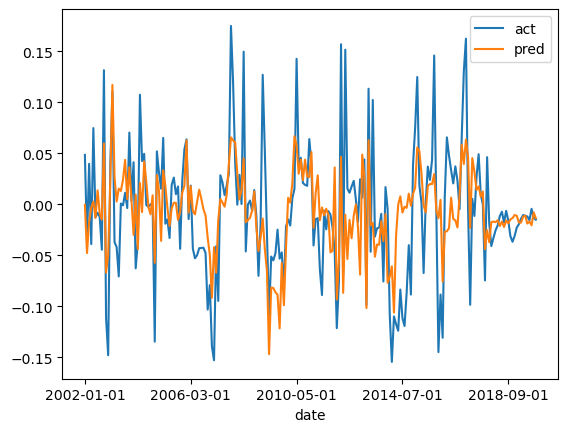

In [69]:
act_pred.plot()